In [1]:
import time
from xml.sax.handler import all_features
#1. Veri Keşfi (EDA)
import pandas as pd
import numpy as np
from IPython.core.pylabtools import figsize
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier
from tensorboard.notebook import display


In [2]:
df_telekom=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',header=0,delimiter=',',na_values='?')

In [3]:
df_telekom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#Veri yapısını incele (eksik, aykırı değerler, dağılımlar).
df_telekom.shape

(7043, 21)

In [5]:
df_telekom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df_telekom.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df_telekom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df_telekom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
x_full=df_telekom.drop(columns='Churn')

In [10]:
#Kategorik ve sayısal değişkenlerin Churn ile ilişkisini görselleştir.
numeric_features=[
    'SeniorCitizen','tenure','MonthlyCharges','TotalCharges'
]

In [11]:
categorial_features=[c for c in x_full if c not in numeric_features]

In [12]:
print(numeric_features)
print(len(categorial_features))


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
16


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

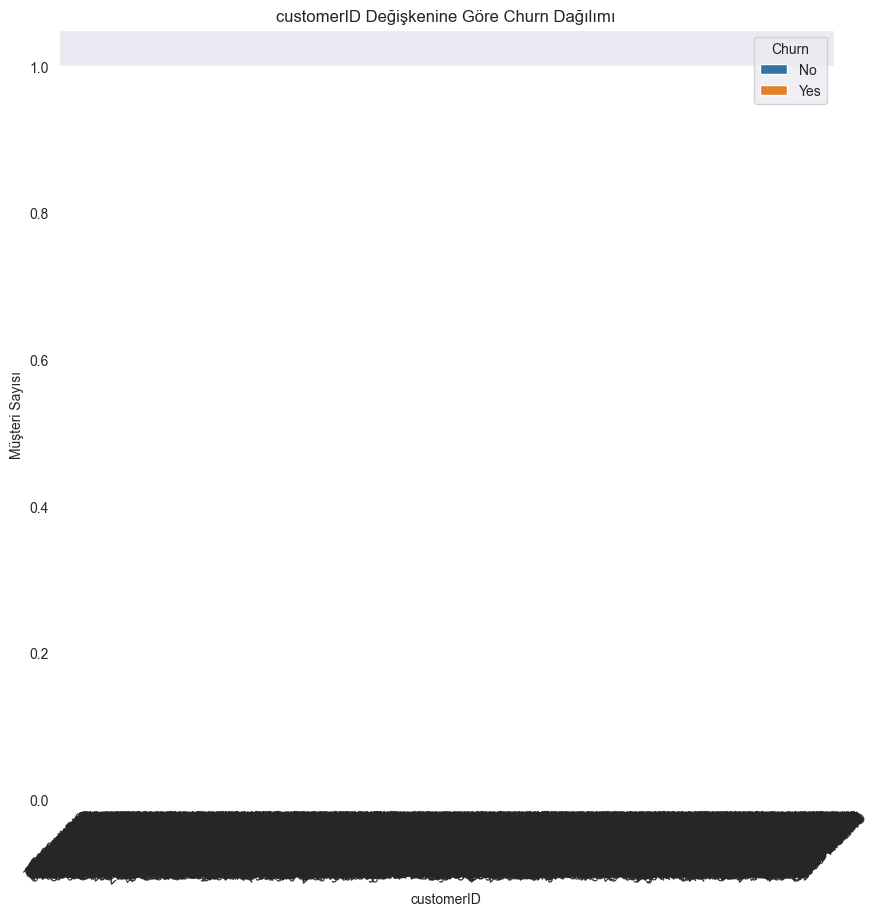

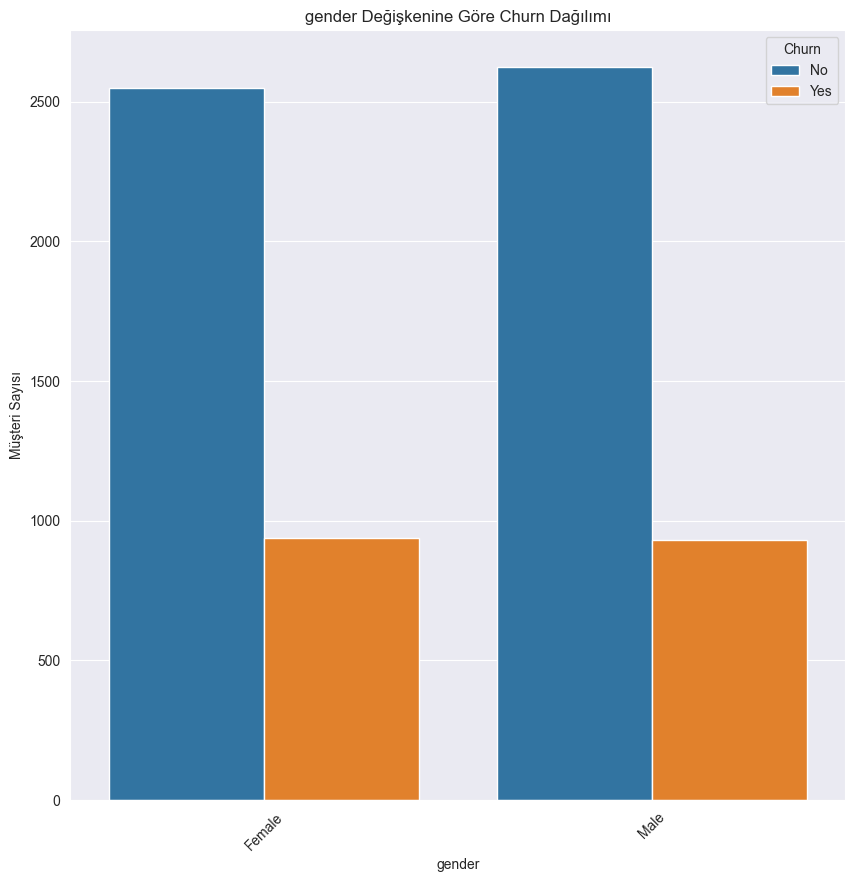

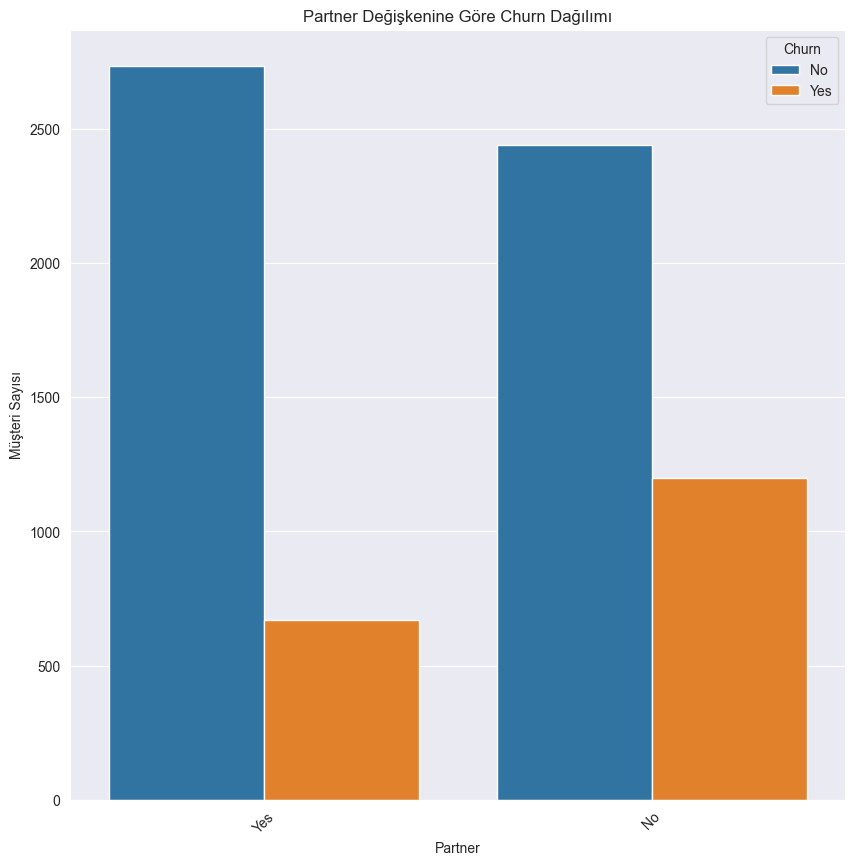

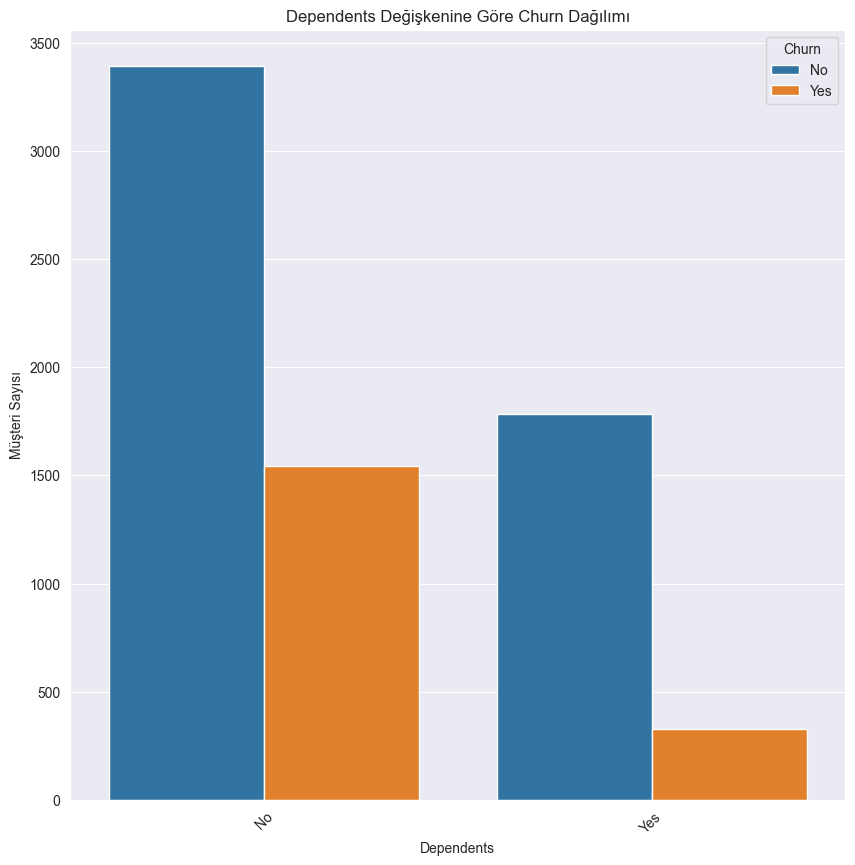

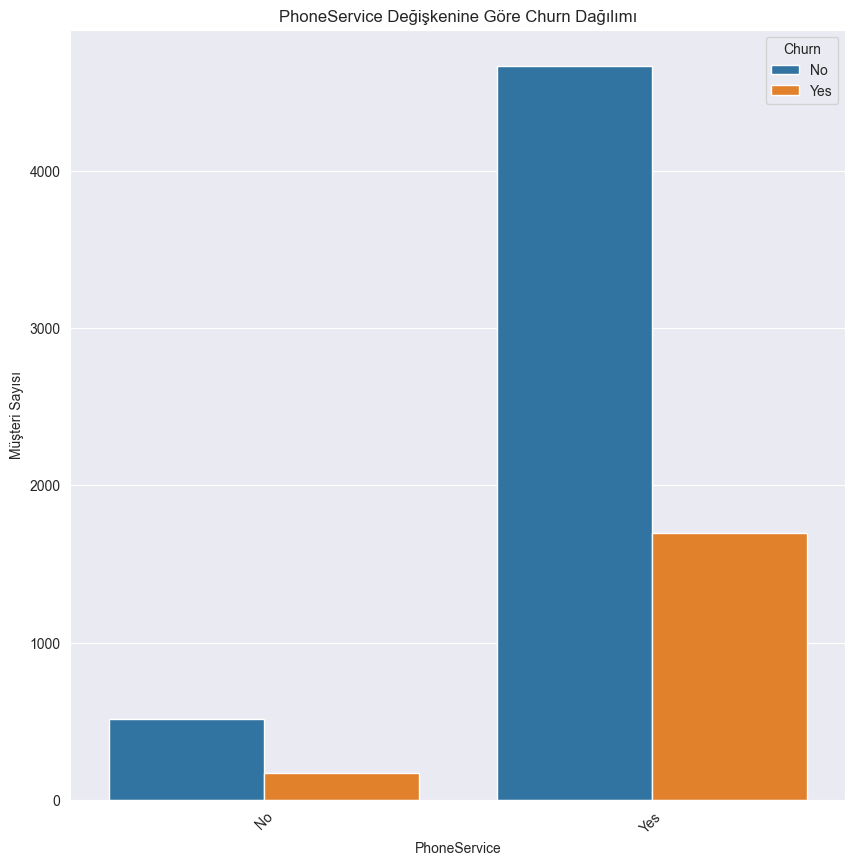

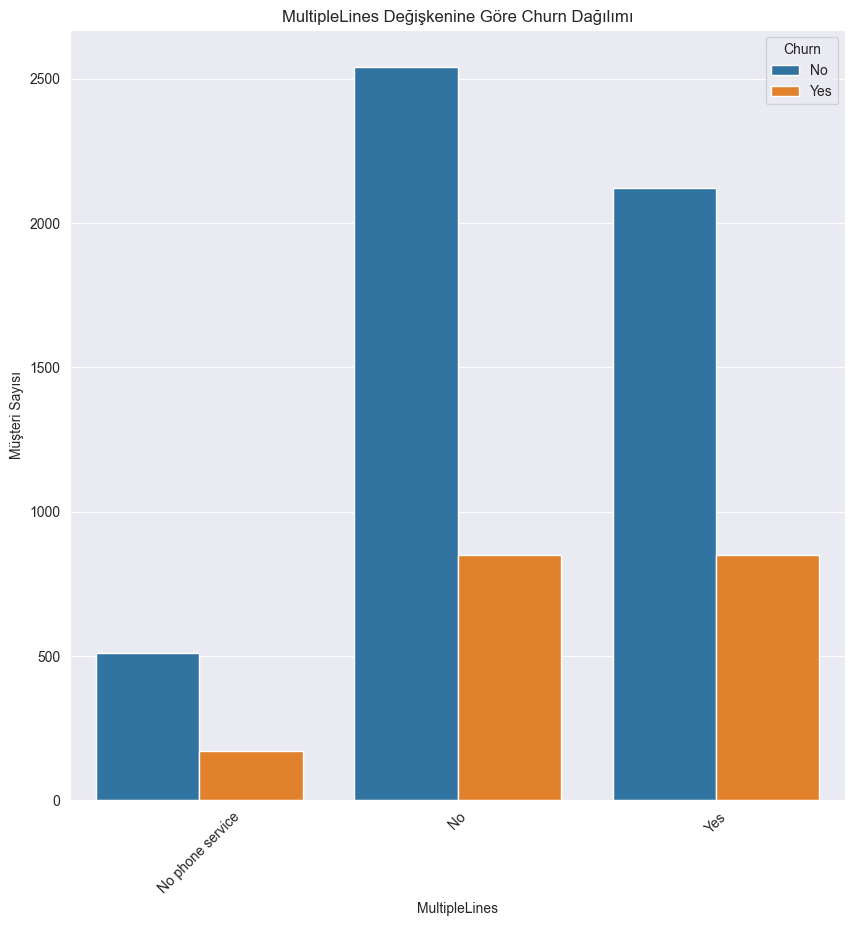

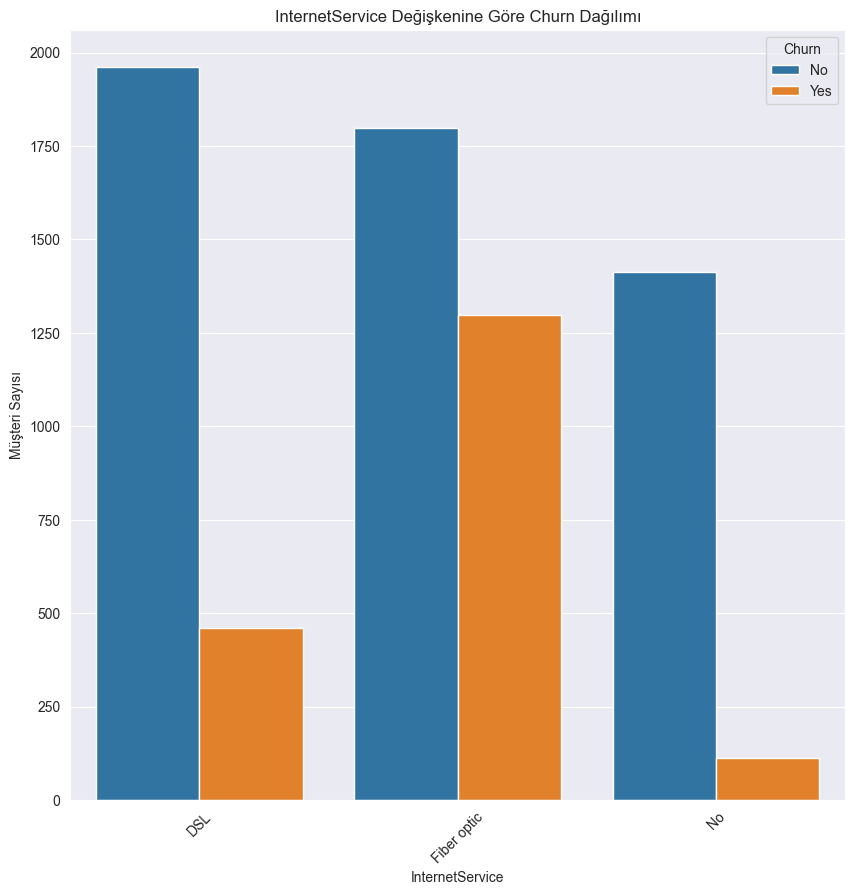

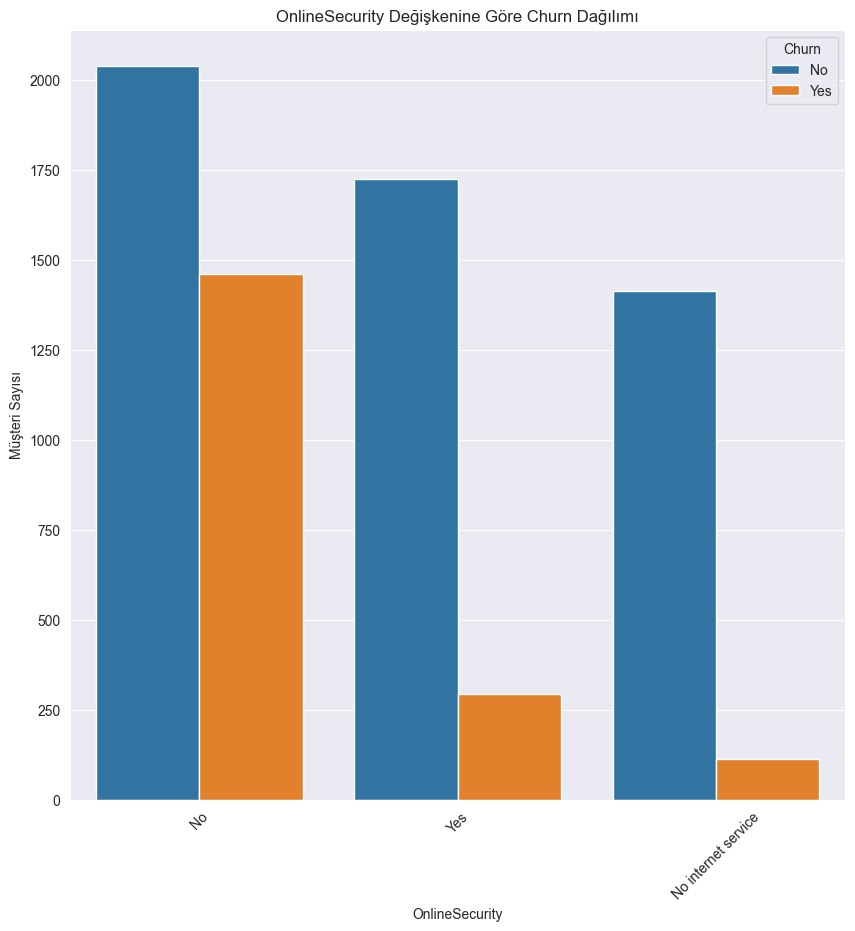

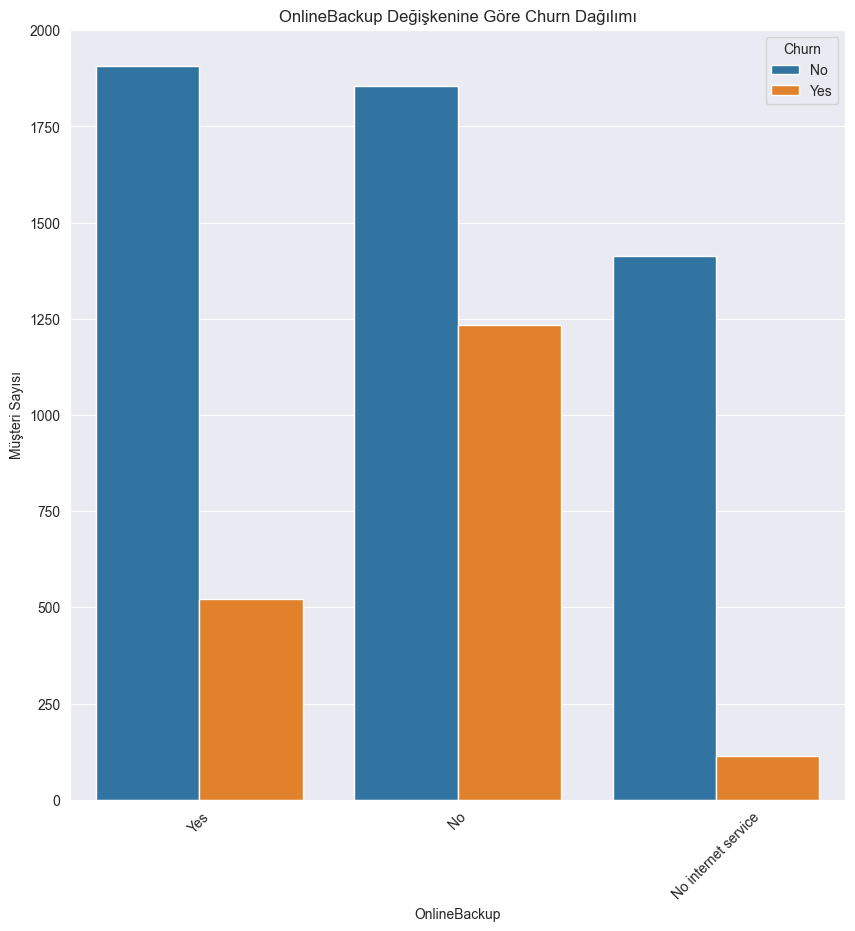

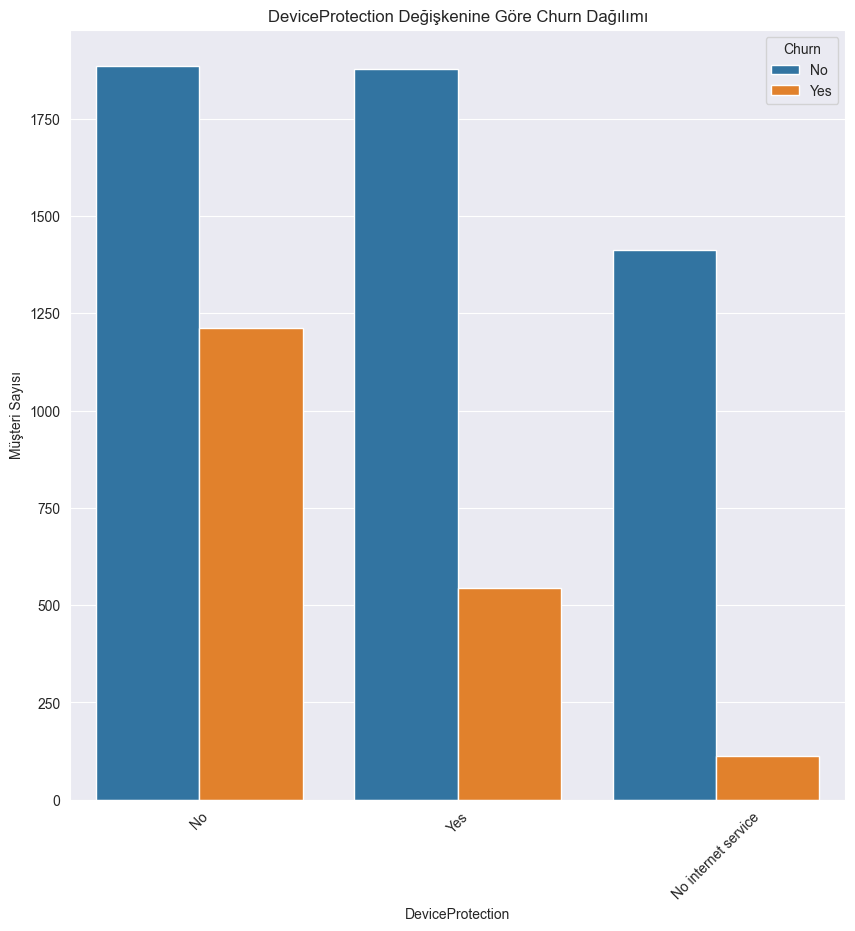

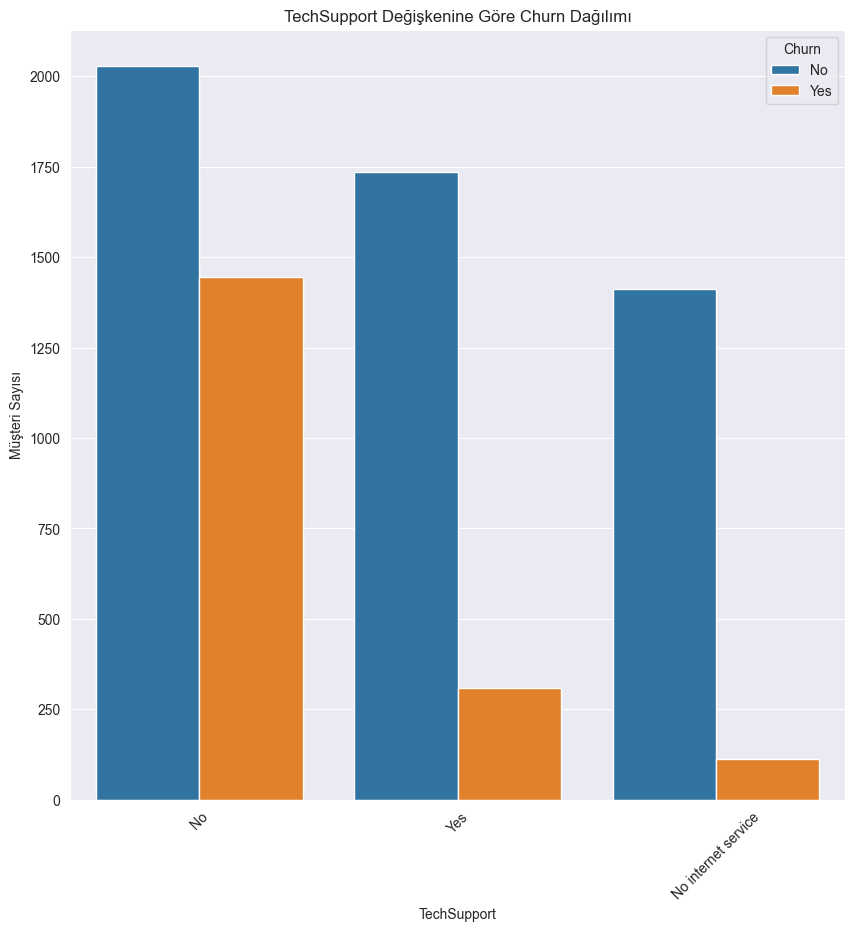

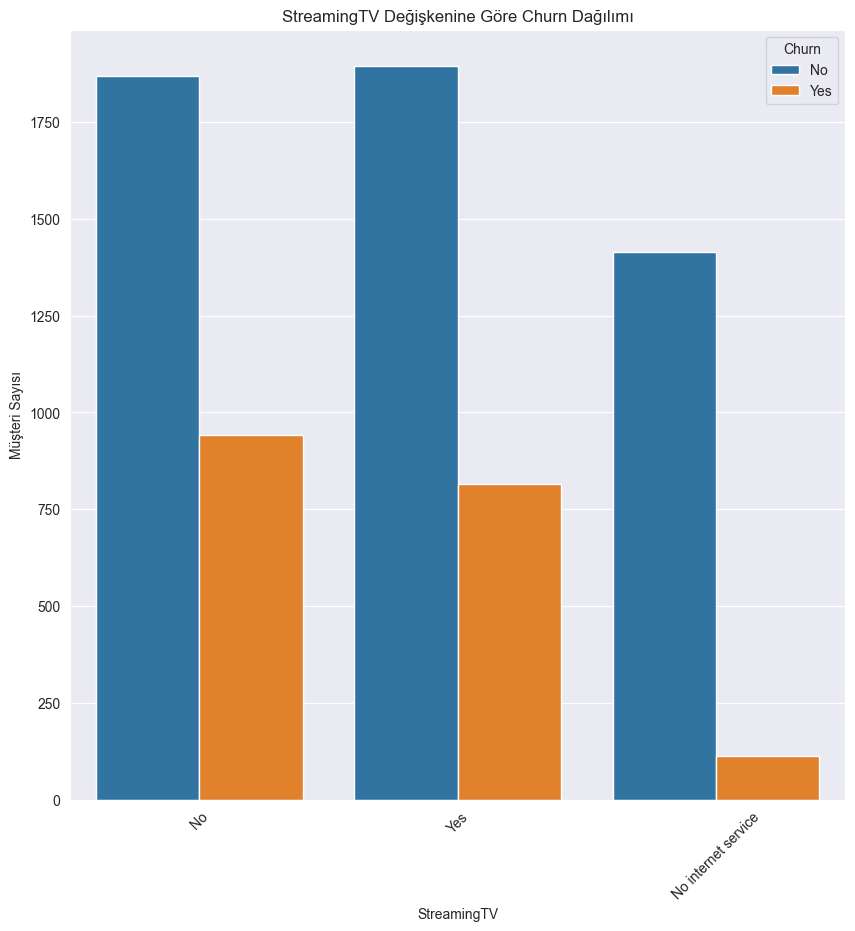

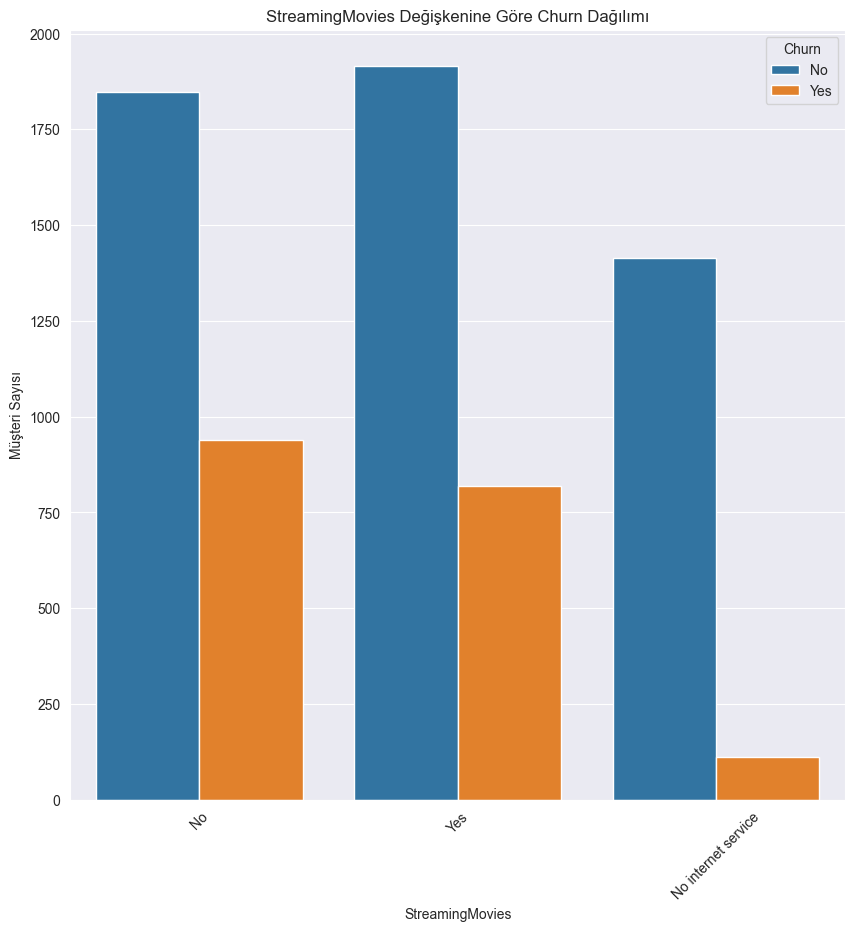

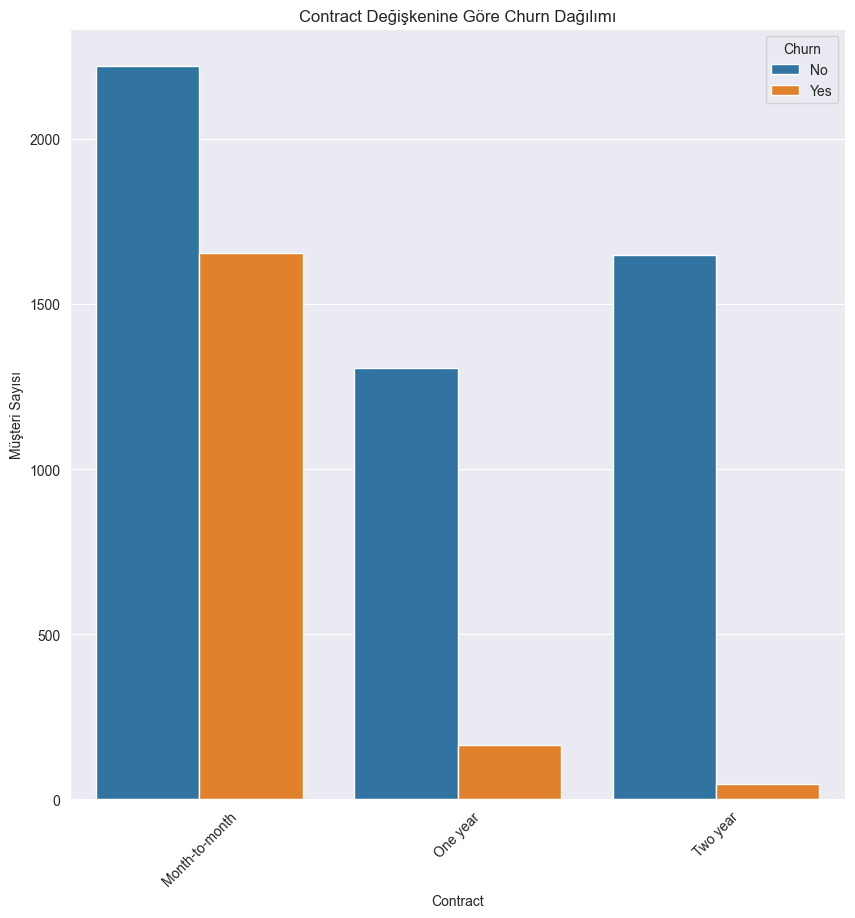

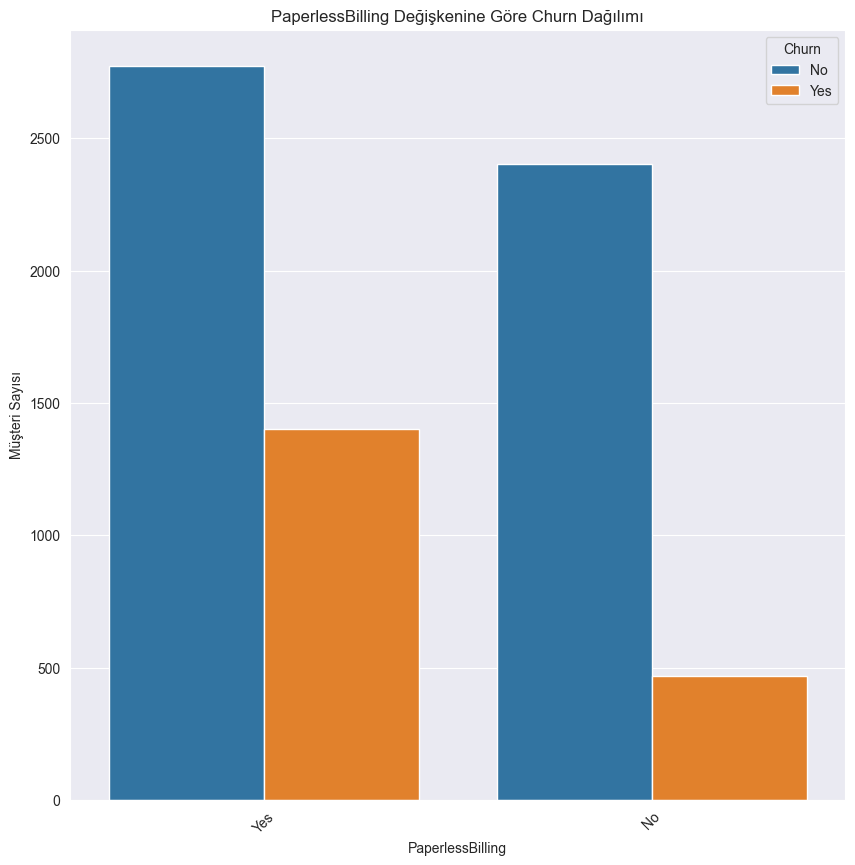

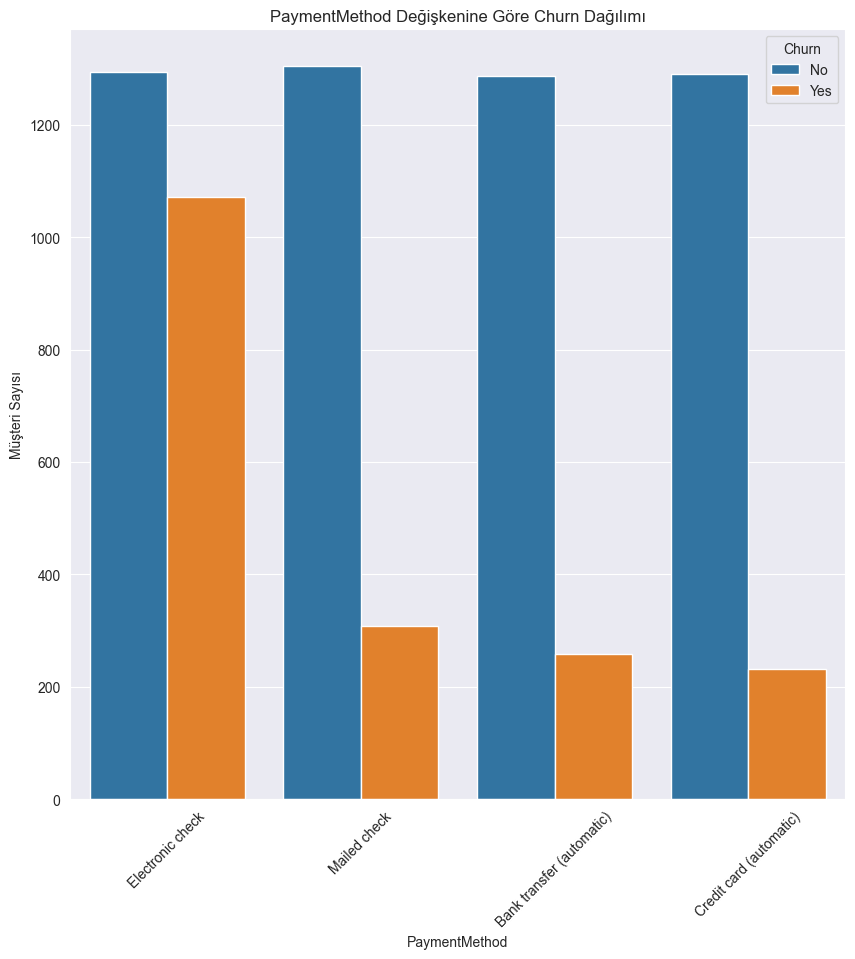

In [14]:
for column in categorial_features:
   if column != 'Churn':
     plt.figure(figsize=(10,10))
     sns.countplot(data=df_telekom, x=column ,hue='Churn')
     plt.title(f'{column} Değişkenine Göre Churn Dağılımı')
     plt.xlabel(column)
     plt.ylabel('Müşteri Sayısı')
     plt.xticks(rotation=45)
     plt.show()

In [15]:
# Sınıf dengesizliğini kontrol et (Yes/No oranı).
yes_no_oran=df_telekom['Churn'].value_counts(normalize=True)*100
print(yes_no_oran)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


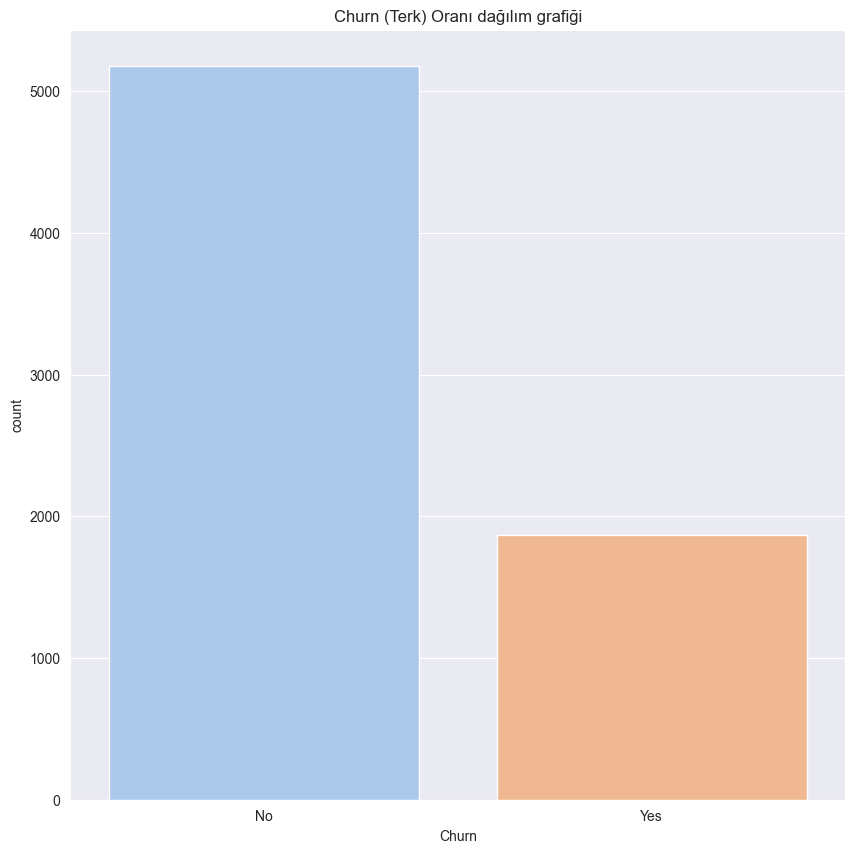

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
ax=sns.countplot(x='Churn',data=df_telekom,palette='pastel',hue='Churn')
ax.set_title('Churn (Terk) Oranı dağılım grafiği')
plt.show()

In [17]:
# Verileri binary (0/1) formuna çevirme
df_telekom['Churn']=df_telekom['Churn'].map({'Yes':1,'No':0})
print(df_telekom['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [18]:
df_telekom['gender']=df_telekom['gender'].map({'Female':1,'Male':0})
print(df_telekom['gender'].value_counts())

gender
0    3555
1    3488
Name: count, dtype: int64


In [19]:
df_telekom['Partner']=df_telekom['Partner'].map({'Yes':1,'No':0})
print(df_telekom['Partner'].value_counts())

Partner
0    3641
1    3402
Name: count, dtype: int64


In [20]:
df_telekom['Dependents']=df_telekom['Dependents'].map({'Yes':1,'No':0})
print(df_telekom['Dependents'].value_counts())

Dependents
0    4933
1    2110
Name: count, dtype: int64


In [21]:
df_telekom['PhoneService']=df_telekom['PhoneService'].map({'Yes':1,'No':0})
print(df_telekom['PhoneService'].value_counts())

PhoneService
1    6361
0     682
Name: count, dtype: int64


In [22]:
#Kategorik sütunları One-Hot encode et. (drop_first=True) ile daha iyi optimize edilmiş One-Hot encode
categorial_columns=[
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
'StreamingMovies','Contract','PaymentMethod'
]

In [23]:
df_encoded=pd.get_dummies(data=df_telekom,columns=categorial_columns,drop_first=True,dtype=int) # drop_first=True : Her sütun grubu için (K-1) kuralını uygular
print(df_encoded)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       1              0        1           0       1   
1     5575-GNVDE       0              0        0           0      34   
2     3668-QPYBK       0              0        0           0       2   
3     7795-CFOCW       0              0        0           0      45   
4     9237-HQITU       1              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       0              0        1           1      24   
7039  2234-XADUH       1              0        1           1      72   
7040  4801-JZAZL       1              0        1           1      11   
7041  8361-LTMKD       0              1        1           0       4   
7042  3186-AJIEK       0              0        0           0      66   

      PhoneService PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0                0              Yes           29.85        29.

In [24]:
#tenure’ı kategorik gruplara ayır (ör. 0–12, 12–24, 24+ ay).
# 1.Adım : Sınırları tanımlama (bins) adlı sınırlar dizisi oluşturuyoruz.
bins=[0,12,24,48,72]

# 2.Adım:Bu grupların etiketlerini (labels) tanımla
labels=['0-12 Ay (Yeni)', '13-24 Ay (1-2 Yıl)', '25-48 Ay (2-4 Yıl)', '49-72 Ay (4+ Yıl)']

# 3.Adım:pd.cut() ile kategorilere ayırma işlemi yapma
df_encoded['tenure_group']=pd.cut(df_telekom['tenure'],bins=bins,labels=labels,include_lowest=True,right=False)
print(df_encoded)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       1              0        1           0       1   
1     5575-GNVDE       0              0        0           0      34   
2     3668-QPYBK       0              0        0           0       2   
3     7795-CFOCW       0              0        0           0      45   
4     9237-HQITU       1              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       0              0        1           1      24   
7039  2234-XADUH       1              0        1           1      72   
7040  4801-JZAZL       1              0        1           1      11   
7041  8361-LTMKD       0              1        1           0       4   
7042  3186-AJIEK       0              0        0           0      66   

      PhoneService PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0                0              Yes           29.85        29.

In [25]:
df_encoded=pd.get_dummies(
    data=df_encoded,
    columns=['tenure_group'],
    drop_first=True,dtype=int
)

df_encoded=df_encoded.drop('tenure',axis=1)
print(df_encoded)

      customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0     7590-VHVEG       1              0        1           0             0   
1     5575-GNVDE       0              0        0           0             1   
2     3668-QPYBK       0              0        0           0             1   
3     7795-CFOCW       0              0        0           0             0   
4     9237-HQITU       1              0        0           0             1   
...          ...     ...            ...      ...         ...           ...   
7038  6840-RESVB       0              0        1           1             1   
7039  2234-XADUH       1              0        1           1             1   
7040  4801-JZAZL       1              0        1           1             0   
7041  8361-LTMKD       0              1        1           0             1   
7042  3186-AJIEK       0              0        0           0             1   

     PaperlessBilling  MonthlyCharges TotalCharges  Churn  ... 

In [26]:
df_encoded

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24 Ay (1-2 Yıl),tenure_group_25-48 Ay (2-4 Yıl),tenure_group_49-72 Ay (4+ Yıl)
0,7590-VHVEG,1,0,1,0,0,Yes,29.85,29.85,0,...,0,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,0,0,0,0,1,No,56.95,1889.5,0,...,0,0,1,0,0,0,1,0,1,0
2,3668-QPYBK,0,0,0,0,1,Yes,53.85,108.15,1,...,0,0,0,0,0,0,1,0,0,0
3,7795-CFOCW,0,0,0,0,0,No,42.30,1840.75,0,...,0,0,1,0,0,0,0,0,1,0
4,9237-HQITU,1,0,0,0,1,Yes,70.70,151.65,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,1,Yes,84.80,1990.5,0,...,0,1,1,0,0,0,1,0,1,0
7039,2234-XADUH,1,0,1,1,1,Yes,103.20,7362.9,0,...,0,1,1,0,1,0,0,0,0,0
7040,4801-JZAZL,1,0,1,1,0,Yes,29.60,346.45,0,...,0,0,0,0,0,1,0,0,0,0
7041,8361-LTMKD,0,1,1,0,1,Yes,74.40,306.6,1,...,0,0,0,0,0,0,1,0,0,0


In [27]:
#Yeni değişkenler türet
df_encoded['Is_Alone']=np.where((df_encoded['Partner']==0)&(df_encoded['Dependents']==0),1,0)
print(df_encoded['Is_Alone'])

0       0
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    1
Name: Is_Alone, Length: 7043, dtype: int64


In [28]:
is_manual=((df_encoded['PaymentMethod_Electronic check']==1) | (df_encoded['PaymentMethod_Mailed check']==1))
df_encoded['Is_Auto_Payment']=np.where(is_manual,0,1)
print(df_encoded['Is_Auto_Payment'])

0       0
1       0
2       0
3       1
4       0
       ..
7038    0
7039    1
7040    0
7041    0
7042    1
Name: Is_Auto_Payment, Length: 7043, dtype: int64


In [29]:
is_only=np.where(df_encoded['InternetService_No']==1,0,1)
df_encoded['Total_Internet_Addons']=(df_encoded['MultipleLines_Yes'].astype(int)+is_only.astype(int)+df_encoded['OnlineSecurity_Yes'].astype(int)+df_encoded['OnlineBackup_Yes'].astype(int)+df_encoded['DeviceProtection_Yes'].astype(int)+df_encoded['TechSupport_Yes'].astype(int)+df_encoded['StreamingTV_Yes'].astype(int)+df_encoded['StreamingMovies_Yes'].astype(int))
print(df_encoded['Total_Internet_Addons'])

0       2
1       3
2       3
3       4
4       1
       ..
7038    7
7039    6
7040    2
7041    2
7042    6
Name: Total_Internet_Addons, Length: 7043, dtype: int64


In [30]:
df_telekom['TotalCharges'] = pd.to_numeric(df_telekom['TotalCharges'], errors='coerce')
df_encoded['Historical_avg']=np.where(df_telekom['tenure']== 0,df_telekom['MonthlyCharges'],df_telekom['TotalCharges']/df_telekom['tenure'])
df_encoded['Price_Hike_Indicator']= df_encoded['MonthlyCharges'] - df_encoded['Historical_avg']
print(df_encoded['Price_Hike_Indicator'])

0       0.000000
1       1.376471
2      -0.225000
3       1.394444
4      -5.125000
          ...   
7038    1.862500
7039    0.937500
7040   -1.895455
7041   -2.250000
7042    1.945455
Name: Price_Hike_Indicator, Length: 7043, dtype: float64


In [31]:
# Sayısal sütunları ölçeklendir (ör. StandardScaler)
df_encoded

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24 Ay (1-2 Yıl),tenure_group_25-48 Ay (2-4 Yıl),tenure_group_49-72 Ay (4+ Yıl),Is_Alone,Is_Auto_Payment,Total_Internet_Addons,Historical_avg,Price_Hike_Indicator
0,7590-VHVEG,1,0,1,0,0,Yes,29.85,29.85,0,...,1,0,0,0,0,0,0,2,29.850000,0.000000
1,5575-GNVDE,0,0,0,0,1,No,56.95,1889.5,0,...,0,1,0,1,0,1,0,3,55.573529,1.376471
2,3668-QPYBK,0,0,0,0,1,Yes,53.85,108.15,1,...,0,1,0,0,0,1,0,3,54.075000,-0.225000
3,7795-CFOCW,0,0,0,0,0,No,42.30,1840.75,0,...,0,0,0,1,0,1,1,4,40.905556,1.394444
4,9237-HQITU,1,0,0,0,1,Yes,70.70,151.65,1,...,1,0,0,0,0,1,0,1,75.825000,-5.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,1,Yes,84.80,1990.5,0,...,0,1,0,1,0,0,0,7,82.937500,1.862500
7039,2234-XADUH,1,0,1,1,1,Yes,103.20,7362.9,0,...,0,0,0,0,0,0,1,6,102.262500,0.937500
7040,4801-JZAZL,1,0,1,1,0,Yes,29.60,346.45,0,...,1,0,0,0,0,0,0,2,31.495455,-1.895455
7041,8361-LTMKD,0,1,1,0,1,Yes,74.40,306.6,1,...,0,1,0,0,0,0,0,2,76.650000,-2.250000


 - AYLIK ÜCRETLERİN SAYISAL METRİKLERİNİN BULUNMASI

In [32]:
df_encoded['MonthlyCharges'].mean()

np.float64(64.76169246059918)

In [33]:
df_encoded['MonthlyCharges'].std()

np.float64(30.090047097678493)

In [34]:
df_encoded['MonthlyCharges'].median()

np.float64(70.35)

- TOPLAM ÜCRET SÜTUNUN SAYISAL METRİKLERİNİN BULUNMASI

In [35]:
df_encoded['TotalCharges']=pd.to_numeric(df_encoded['TotalCharges'],errors='coerce')
df_encoded['TotalCharges'].mean()

np.float64(2283.3004408418656)

In [36]:
df_encoded['TotalCharges'].std()

np.float64(2266.771361883145)

In [37]:
df_encoded['TotalCharges'].median()

np.float64(1397.475)

In [38]:
df_encoded['TotalCharges'].max()

np.float64(8684.8)

In [39]:
df_encoded['TotalCharges'].min()

np.float64(18.8)

- TOPLAM İNTERNET ABONELİKLERİ SÜTUNUN SAYISAL METRİKLERİNİN BULUNMASI

In [40]:
df_encoded['Total_Internet_Addons'].mean()

np.float64(3.243078233707227)

In [41]:
df_encoded['Total_Internet_Addons'].std()

np.float64(2.30714072683329)

In [42]:
df_encoded['Total_Internet_Addons'].median()

np.float64(3.0)

In [43]:
df_encoded['Total_Internet_Addons'].max()

np.int64(8)

In [44]:
df_encoded['Total_Internet_Addons'].min()

np.int64(0)

- MÜSTERİNİN ABONELİK SÜRESİ BOYUNCA ÖDEDİĞİ AYLIK ORTALAMA FATURA BEDELİNİN SAYISAL METRİKLERİNİN BULUNMASI

In [45]:
df_encoded['Historical_avg'].mean()

np.float64(64.76290591667771)

In [46]:
df_encoded['Historical_avg'].std()

np.float64(30.189795909601063)

In [47]:
df_encoded['Historical_avg'].median()

np.float64(70.3375)

In [48]:
# 	Korelasyon analizi yap ve çıkarımlarını yorumla.

In [49]:
df_encoded['PaperlessBilling']=df_encoded['PaperlessBilling'].map({'No':0,'Yes':1})

In [50]:
df_numeric=df_encoded.drop('customerID',axis=1)

In [51]:
df_numeric['TotalCharges']=pd.to_numeric(df_numeric['TotalCharges'],errors='coerce')

In [52]:
df_numeric=df_numeric.dropna()

In [53]:
# .corr() fonksiyonu, tüm sütunlar arasındaki korelasyonu hesaplar
# Sonuç, her sütunun her sütunla ilişkisini gösteren bir matris (tablo) olur
corr_matrix = df_numeric.corr()

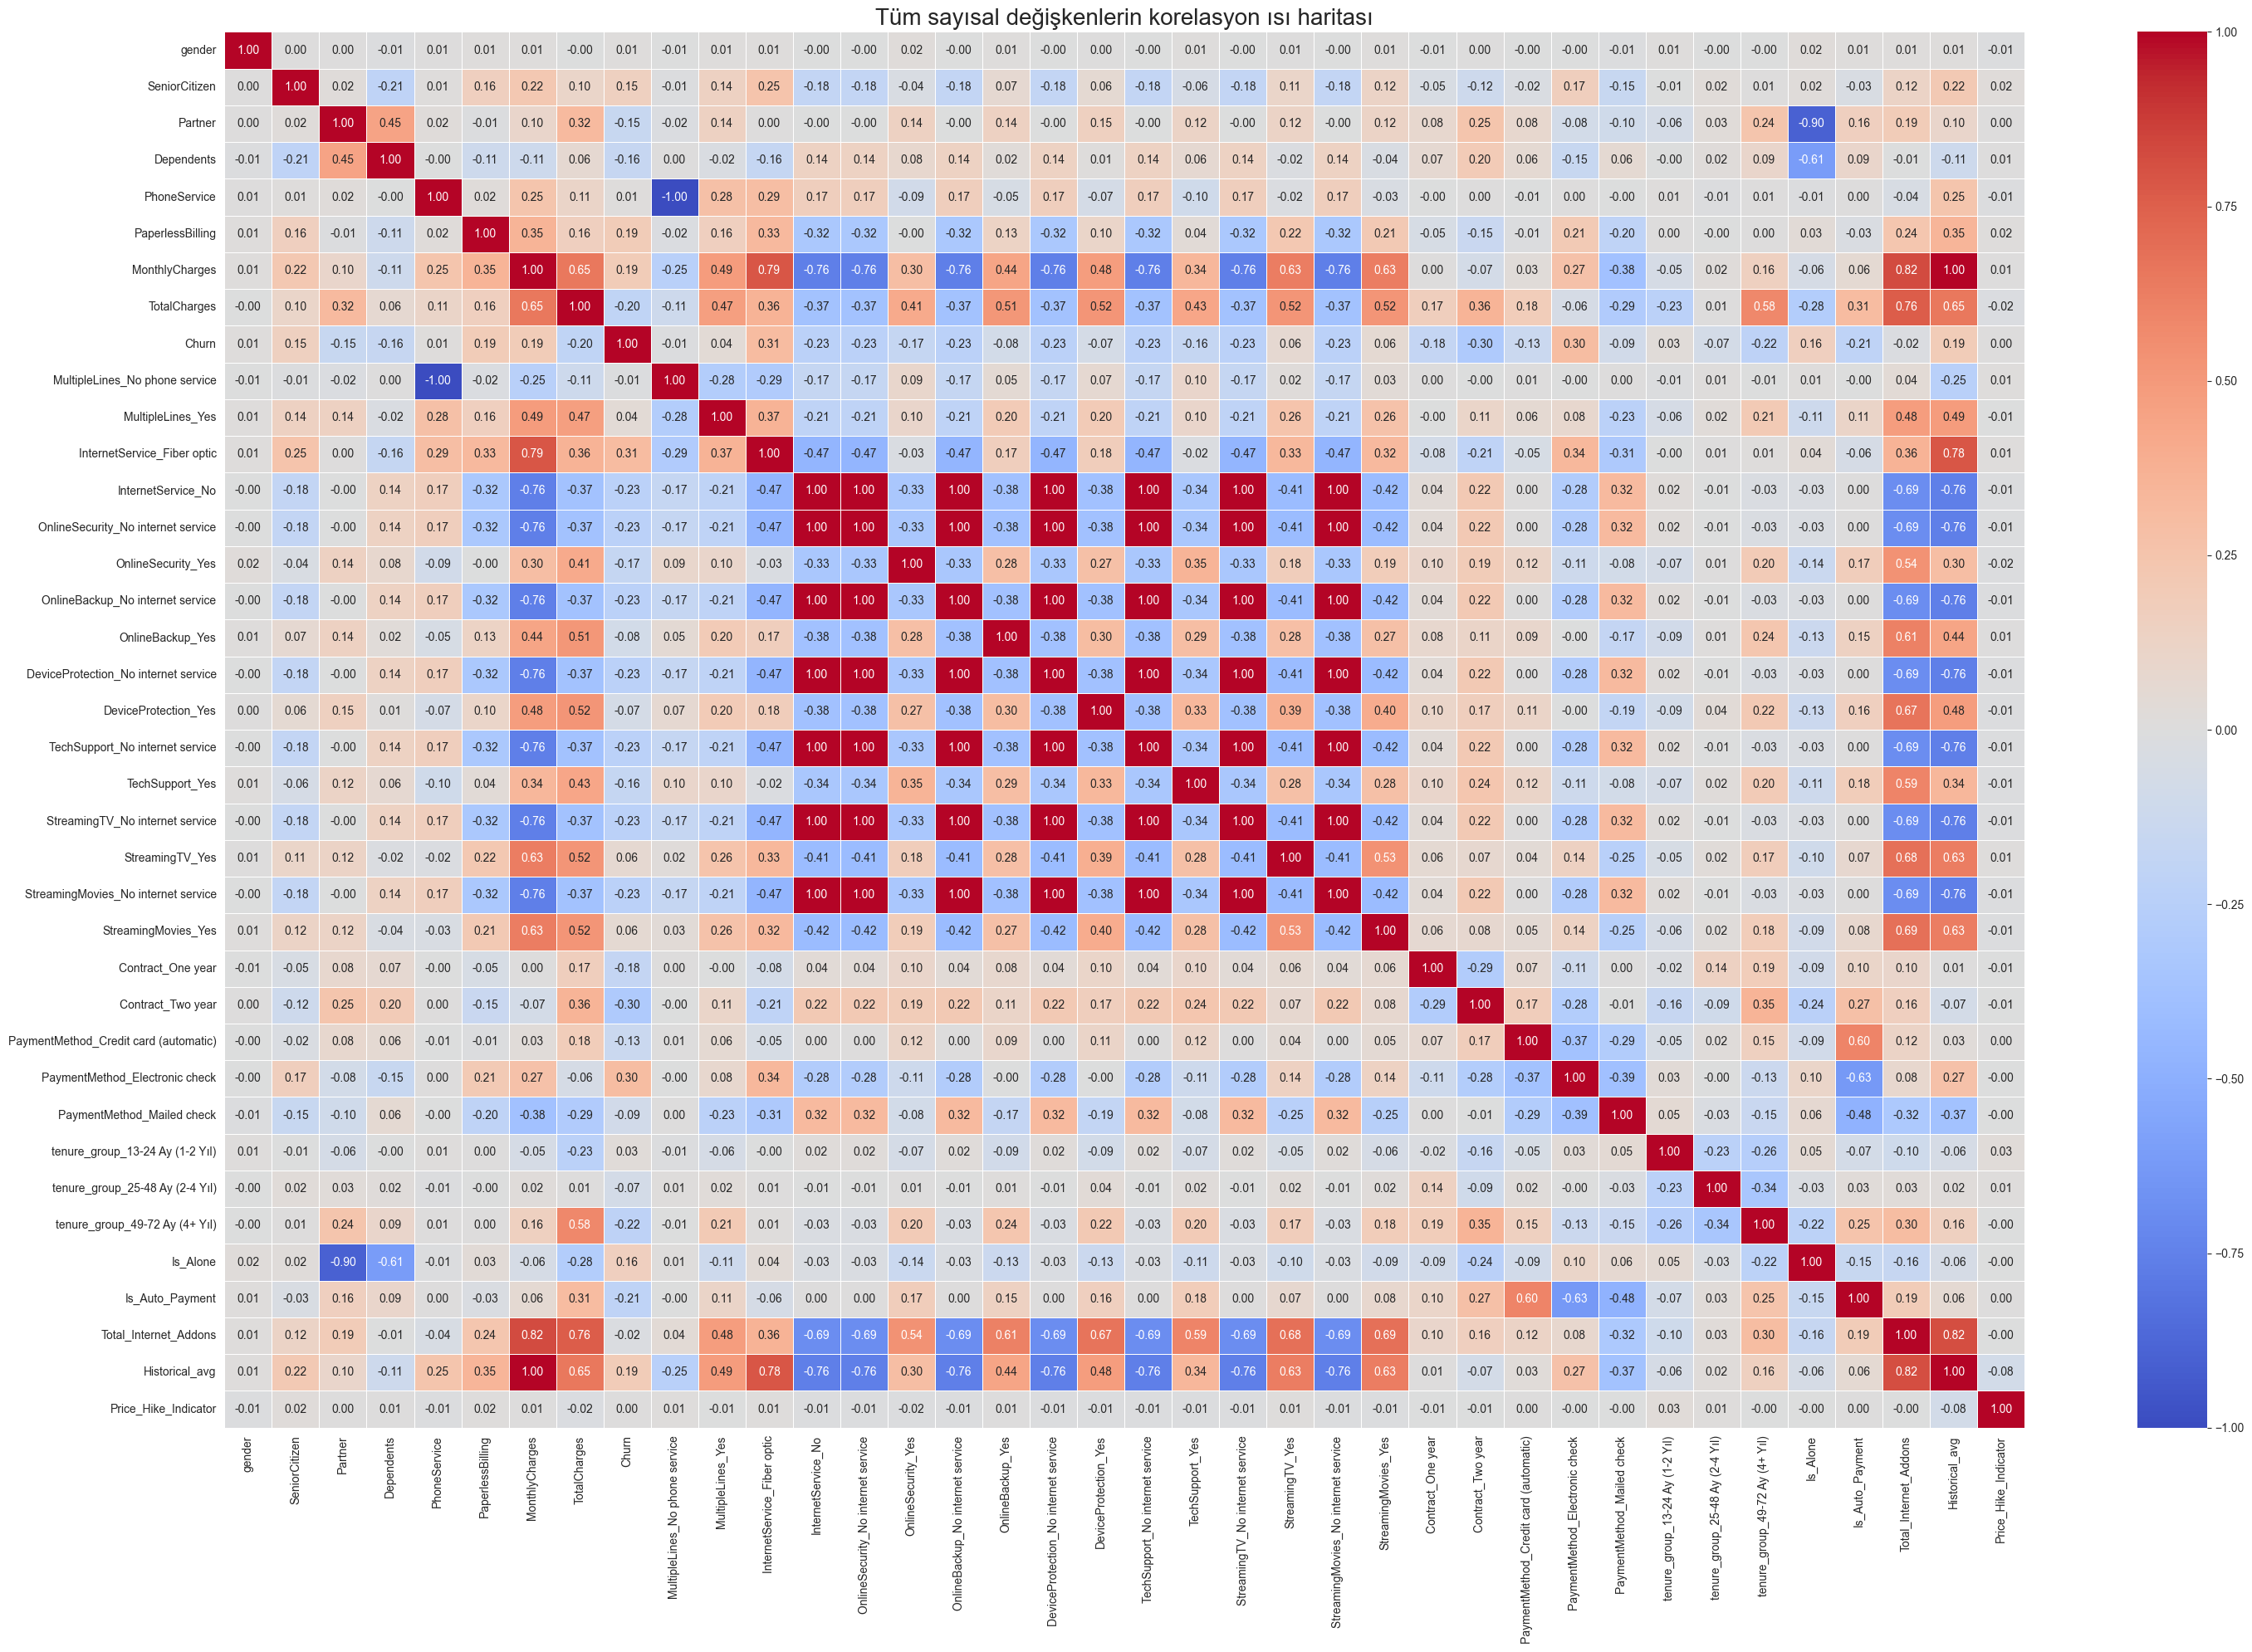

In [54]:
plt.figure(figsize=(30,20))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths= .5
)

plt.title('Tüm sayısal değişkenlerin korelasyon ısı haritası',fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig('correlation_heatmap.png')
plt.show()

In [55]:
# Korelasyon matrisinden sadece 'Churn' sütununu seçtik
# .sort_values(ascending=False) ile büyükten küçüğe sıraladık
churn_correlations = corr_matrix['Churn'].sort_values(ascending=False)

# Sonucu ekrana yazdırdık
print("--- 'Churn' (Müşteri Kaybı) Sütunu ile Korelasyonlar ---")
print(churn_correlations)

--- 'Churn' (Müşteri Kaybı) Sütunu ile Korelasyonlar ---
Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
Historical_avg                           0.192033
PaperlessBilling                         0.191454
Is_Alone                                 0.162113
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
tenure_group_13-24 Ay (1-2 Yıl)          0.027783
PhoneService                             0.011691
gender                                   0.008545
Price_Hike_Indicator                     0.002160
MultipleLines_No phone service          -0.011691
Total_Internet_Addons                   -0.021192
DeviceProtection_Yes                    -0.066193
tenure_group_25-48 Ay (2-4 Yıl)         -0.

# Korelasyon Analizi
🎯 Churn (Terk Etme) ile En Güçlü İlişkiler
Churn'ü Artıran (Pozitif Korelasyonlu) Faktörler - Kırmızı Bayraklar 🚩:

-Contract_Month-to-month (Aydan Aya Kontrat): Haritadaki Churn ile en güçlü kırmızı karelerden biri budur (tahmini +0.40). Bu, aydan aya kontrat yapan müşterilerin terk etmeye en yatkın grup olduğunu gösterir.

-OnlineSecurity_No / TechSupport_No / OnlineBackup_No: Bu hizmetleri almayan (_No ile biten) müşterilerin Churn ile güçlü pozitif bir ilişkisi var (kırmızı).

-InternetService_Fiber-optic (Fiber Optik): Bu da Churn ile pozitif bir ilişki gösteriyor (kırmızı, tahmini +0.30). Bu ilginç bir bulgu; fiber müşterilerinin daha fazla terk ettiğini gösterir.

-PaymentMethod_ElectronicCheck (Elektronik Çek): Terk etme ile belirgin bir pozitif ilişkisi (kırmızı, tahmini +0.30) olan bir diğer önemli değişkendir.

-MonthlyCharges (Aylık Ücretler): Aylık ücretler arttıkça, terk etme eğilimi de (hafif de olsa) artmaktadır (açık kırmızı, tahmini +0.19).

## Churn'ü Azaltan (Negatif Korelasyonlu) Faktörler - Yeşil Bayraklar 💚:

-tenure (Müşteri Süresi): Churn ile en güçlü negatif korelasyona (en koyu mavi, tahmini -0.35) sahip değişkendir. Bu, müşteri süresi uzadıkça terk etme olasılığının azaldığını net bir şekilde kanıtlar.

-Contract_Two_year (2 Yıllık Kontrat): Churn ile güçlü negatif bir ilişkisi (koyu mavi, tahmini -0.30) vardır. 2 yıllık taahhüt veren müşteriler en sadık gruptur.

-Dependents (Bakmakla Yükümlü Olduğu Kişiler) ve Partner: Her ikisi de Churn ile negatif korelasyona (mavi, tahmini -0.15 civarı) sahiptir. Bu, partneri olan veya bakmakla yükümlü olduğu kişiler (çocuk vb.) olan müşterilerin daha az terk ettiğini gösterir.

-PaymentMethod_CreditCard (auto) ve BankTransfer (auto): Otomatik ödeme yöntemlerinin her ikisi de Churn ile negatif (mavi) bir ilişkiye sahiptir.

# Model Ouşturma İşlemi Öncesi Analiz
 - Neler Yaptık
    Modelleme işlemine hazır hale getirdiğimiz veri grubunu şu aşamalardan geçirdik:
    - NaN değer kontrolü : Elimize geçen veri grubunu baz aldığımızda direkt olarak NaN sınıfına sokacağımız bir değerlerimiz yok idi ama MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod ve Contract sütunlarında üç veya daha fazla ayrı tercih durumunun oluşması bizi One-Hot encoding yöntemine yönlendirdi.
    - Aykırı değer kontrolleri : Modelimizi doğrudan yönlendirecek 3 ana sayısal sütunumuz vardı.Bunlar; totalcharges,tenure,monthlycharges adlı sütunlardı.Modelimiz için aykırı değerleri barınıran totalcharges ve tenure sütunları(yani değişkenkerimiz) ilk aydan cayan ve uzun süreli +72 ay müşteri kitlesinin olması bu değişkenlerin normal dağılımda aykırı kalan veri grubu olarak kalabilir.Ancak gerçek hayata yönelik bir model geliştirmek istiyorsak bu değerleri dahil etmemiz daha doğru olur.Bu yüzden aykırı değer incelemizde modeli büyük bir şekilde etkileyecek bir veri grubu skalası bulamadık.
    - Kategorik ve sayısal değişkenlerin Churn ile ilişkisi: Hem kategorik hem de sayısal veriler incelendiğinde partneri olan müşterilerin ayrılmama oranının daha yüksek olduğunu ayrıca çocuklu müşterilerin abonelik kalma oranının daha yüksek olduğunu gözlemliyoruz.Buradan firmamızın çocuklu aileler için daha iyi bir opsiyon olduğunu görüyoruz.Bunun sebebi çocuklar için güvenli internet profillerinin pazardaki diğer firmalara göre daha iyi olduğu gibi sonuçlara varabiliriz. Dsl ve fiber-optik aboneleri için incelediğimizde fiber-optik abonelerinin bariz bir şekilde ayrılamaya meyilli olduğunu görüyoruz , buradan ise firmamızın fiber-optik bağlantılı kullanıcılara iyi hizmet veremediğini gösterir.Dsl kullanıcılarda daha az bir ayrılma oranı görüyoruz. Online security ,online backup ve device protection hizmetlerinde ise bu hizmetleri kullanan müşteri grubunun ayrılma oranının diğer gruba göre daha az olması ise bu hizmetlerin  başarı oranının yüksek olduğunu gösterir.Tech support ,streamingTv ve streamingMovies gibi hizmetlerde de aynı etkiyi gözlemlemekteyiz ama buradaki oranların biraz daha birbirine yakın olması bu hizmetlerin bazı geliştirme ve güncellemeler ile daha kullanıcı dostu bir hale getirilebileceğini görebiliyoruz. Ödeme ve kontrat işlemlerinde ise aydan aya kontrat yapanların daha fazla kontratlarını devam ettirmeme eğilimi gözlemlenmiştir.Bu da yıllık ve 2 yıllık kontrat yapanlara yapılan tekliflerin yeterince olumlu etki uyandırdığını varsayabiliyoruz.Ödeme öntemlerinde ise otomatik ödeme kullanıcıların bariz bir şekilde ayrılmama eğilimi gösterdiği gözlemliyoruz , bu da otomatik ödeme yönteminin olumlu bir özellik gösterdiği sonucuna ulaştırıyor.
    - Sınıf dengesizliği:Genel olarak veri grubunda kalmaya meyilli abonelerin (Churn sütununda yes oranının no oranına göre oldukça düşük olması ChurnNo     %73.463013 / Yes  % 26.536987) fazla olması bu veri grubu ile oluşturulacak modelin ROC-AUC ve recall değerlerinin düşük (1 den uzak) olmasına yol açabilir yani modelimizin hata oranını artıracaktır.
    - Yeni değişkenler türetilmesi : Bu ise yukarıda değindiğimiz sınıf dengesizliğinin etkisini azaltmada ve modelimizi eğtimek için daha fazla sayısal değişken tanımladık.Sadece sayısal değişken olarak değil kategorik değişkenlerden de yeni değişkenler türeterek modelimiz eğitim aşamasında kafa karışıklığı yaşamaması için oldukça olumlu etkileri olacaktır.Tenure değişkenin kategorik olarak ayrılması ise modelimizin daha kolay bir şekilde ilşkileri değerlendirmesini sağlayacaktır.


## 3. Modelleme
📊 Değişken Ayrıştırması


In [56]:
#Eğitim/test ayrımı (ör. 80/20)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)


🔢 Sayısal Değişkenler:

In [57]:
numerical_features=[
    'MonthlyCharges',
    'TotalCharges',
    'Total_Internet_Addons',
    'Historical_avg'
]

In [58]:
categorical_features=[
    # Yüksek Pozitif Korelasyonlu (Risk Faktörleri)
    'InternetService_Fiber optic',          # +0.307
    'PaymentMethod_Electronic check',       # +0.301
    'PaperlessBilling',                     # +0.191
    'Is_Alone',                             # +0.162
    'SeniorCitizen',                        # +0.151

    # Orta-Düşük Pozitif Korelasyonlu
    'StreamingTV_Yes',                      # +0.063
    'StreamingMovies_Yes',                  # +0.061
    'MultipleLines_Yes',                    # +0.040
    'tenure_group_13-24 Ay (1-2 Yıl)',      # +0.028
    'PhoneService',                         # +0.012
    'gender',                               # +0.009
    'Price_Hike_Indicator',                 # +0.002

    # Negatif Korelasyonlu (Koruyucu Faktörler)
    'MultipleLines_No phone service',       # -0.012
    'DeviceProtection_Yes',                 # -0.066
    'tenure_group_25-48 Ay (2-4 Yıl)',      # -0.071
    'OnlineBackup_Yes',                     # -0.082
    'PaymentMethod_Mailed check',           # -0.091
    'PaymentMethod_Credit card (automatic)', # -0.135
    'Partner',                              # -0.150
    'Dependents',                           # -0.163
    'TechSupport_Yes',                      # -0.165
    'OnlineSecurity_Yes',                   # -0.171
    'Contract_One year',                    # -0.178
    'Is_Auto_Payment',                      # -0.210
    'tenure_group_49-72 Ay (4+ Yıl)',       # -0.216

    # "No internet service" Grubu (Referans Kategori)
    'StreamingTV_No internet service',      # -0.228
    'TechSupport_No internet service',      # -0.228
    'OnlineBackup_No internet service',     # -0.228
    'DeviceProtection_No internet service', # -0.228
    'InternetService_No',                   # -0.228
    'OnlineSecurity_No internet service',   # -0.228
    'StreamingMovies_No internet service',  # -0.228

    # En Güçlü Negatif Korelasyon
    'Contract_Two year'                     # -0.302
]

In [59]:
all_features=numerical_features+categorical_features # Random Forest ve XGBoost önemli feature'ları otomatik seçeceği için birleştirme işlemi yapıyoruz.

In [60]:
X=df_numeric[all_features].copy()
y=df_numeric['Churn']

In [61]:
scaler=StandardScaler()

In [62]:
num_cols=[col for col in numerical_features if col in X.columns]
X[num_cols]=scaler.fit_transform(X[num_cols])

In [63]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y # Churn dağılımını koru
)

In [64]:
#  En az 3 model karşılaştır:
#  Logistic Regression
# Random Forest
# XGBoost veya LightGBM

In [65]:
models={
    'LogisticRegression':LogisticRegression(random_state=42,max_iter=1000,C=1.0,solver='lbfgs',class_weight='balanced'),
    'RandomForest':RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=100),
    'XGBoost':XGBClassifier(random_state=42,eval_metric='logloss',n_estimators=100,scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])),
    'LightGBM':LGBMClassifier(random_state=42,class_weight='balanced',n_estimators=100,verbose=-1,force_col_wise=True),
}

In [66]:
from  sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds = list(skf.split(X_train, y_train))

In [67]:
# Model değerlendirme fonksiyonu
import time
def evulate_model(model,X_train,y_train,folds):
    fold_results ={
      'accuracy':[],'recall':[],'precision':[],'f1':[],
        'roc_auc':[],'train_sizes':[],'fit_times':[]
     }
    for fold,(train_idx,val_idx) in enumerate(folds):
        X_fold_train,X_fold_val=X_train.iloc[train_idx],X_train.iloc[val_idx]
        y_fold_train,y_fold_val=y_train.iloc[train_idx],y_train.iloc[val_idx]

        start_time=time.time()
        model.fit(X_fold_train,y_fold_train)
        fit_time=time.time()-start_time

        y_preb=model.predict(X_fold_val)
        y_proba=model.predict_proba(X_fold_val)[:,1]

        fold_results['accuracy'].append(accuracy_score(y_fold_val,y_preb))
        fold_results['recall'].append(recall_score(y_fold_val,y_preb))
        fold_results['precision'].append(precision_score(y_fold_val,y_preb))
        fold_results['f1'].append(f1_score(y_fold_val,y_preb))
        fold_results['roc_auc'].append(roc_auc_score(y_fold_val,y_proba))
        fold_results['train_sizes'].append(len(y_fold_train))
        fold_results['fit_times'].append(fit_time)
    return fold_results





In [68]:
all_model_results={ }
print("🚀 MODELLER K-FOLD CROSS VALIDATION İLE DEĞERLENDİRİLİYOR...")

for model_name,model in models.items():
    print(f"\n🎯 {model_name} değerlendiriliyor...")

    try:
        results = evulate_model(model,X_train,y_train,folds)
        all_model_results[model_name]=results

        print(f"   ✅ Accuracy:    {np.mean(results ['accuracy']):.4f} (±{np.std(results['accuracy']):.4f})")
        print(f"   ✅ Recall:      {np.mean(results['recall']):.4f} (±{np.std(results['recall']):.4f})")
        print(f"   ✅ Precision:   {np.mean(results['precision']):.4f} (±{np.std(results['precision']):.4f})")
        print(f"   ✅ F1-Score:    {np.mean(results['f1']):.4f} (±{np.std(results['f1']):.4f})")
        print(f"   ✅ ROC-AUC:     {np.mean(results['roc_auc']):.4f} (±{np.std(results['roc_auc']):.4f})")
        print(f"   ⏱️  Ortalama Eğitim Süresi: {np.mean(results['fit_times']):.2f}s")

    except Exception as e:
        print(f"❌ Hata : {model_name} değerlendirilemedi. ",{str(e)})
        all_model_results[model_name]=None


🚀 MODELLER K-FOLD CROSS VALIDATION İLE DEĞERLENDİRİLİYOR...

🎯 LogisticRegression değerlendiriliyor...
   ✅ Accuracy:    0.7506 (±0.0073)
   ✅ Recall:      0.7906 (±0.0155)
   ✅ Precision:   0.5204 (±0.0093)
   ✅ F1-Score:    0.6276 (±0.0086)
   ✅ ROC-AUC:     0.8438 (±0.0074)
   ⏱️  Ortalama Eğitim Süresi: 0.05s

🎯 RandomForest değerlendiriliyor...
   ✅ Accuracy:    0.7932 (±0.0079)
   ✅ Recall:      0.4823 (±0.0315)
   ✅ Precision:   0.6492 (±0.0155)
   ✅ F1-Score:    0.5531 (±0.0248)
   ✅ ROC-AUC:     0.8289 (±0.0083)
   ⏱️  Ortalama Eğitim Süresi: 0.83s

🎯 XGBoost değerlendiriliyor...
   ✅ Accuracy:    0.7735 (±0.0086)
   ✅ Recall:      0.6448 (±0.0185)
   ✅ Precision:   0.5647 (±0.0143)
   ✅ F1-Score:    0.6021 (±0.0155)
   ✅ ROC-AUC:     0.8258 (±0.0055)
   ⏱️  Ortalama Eğitim Süresi: 0.56s

🎯 LightGBM değerlendiriliyor...
   ✅ Accuracy:    0.7723 (±0.0077)
   ✅ Recall:      0.7191 (±0.0157)
   ✅ Precision:   0.5553 (±0.0111)
   ✅ F1-Score:    0.6266 (±0.0130)
   ✅ ROC-AUC:     0

📊 Karşılaştırma Tablosu

In [69]:
result_summary= []
for model_name ,results in all_model_results.items():
    if results is not None:
        result_summary.append({
            'Model':model_name,
            'Accuracy': f"{np.mean(results['accuracy']):.4f} (±{np.std(results['accuracy']):.4f})",
            'Recall': f"{np.mean(results['recall']):.4f} (±{np.std(results['recall']):.4f}) ",
            'Precision': f"{np.mean(results['precision']):.4f} (±{np.std(results['precision']):.4f})",
            'F1-Score':f"{np.mean(results['f1']):.4f} (±{np.std(results['f1']):.4f})",
            'ROC-AUC': f"{np.mean(results['roc_auc']):.4f} (±{np.std(results['roc_auc']):.4f})",
            'Train_time(s)':f"{np.mean(results['fit_times']):.2f}s"
        })


df_results=pd.DataFrame(result_summary)
df_results['ROC_AUC_Value']=df_results['ROC-AUC'].str.extract('([0-9.]+)').astype(float)
df_results=df_results.sort_values('ROC_AUC_Value',ascending=False).drop('ROC_AUC_Value',axis=1)

print("📊 4 MODELİN K-FOLD CROSS VALIDATION KARŞILAŞTIRMASI")
print(df_results.to_string(index=False))


📊 4 MODELİN K-FOLD CROSS VALIDATION KARŞILAŞTIRMASI
             Model         Accuracy            Recall        Precision         F1-Score          ROC-AUC Train_time(s)
LogisticRegression 0.7506 (±0.0073) 0.7906 (±0.0155)  0.5204 (±0.0093) 0.6276 (±0.0086) 0.8438 (±0.0074)         0.05s
          LightGBM 0.7723 (±0.0077) 0.7191 (±0.0157)  0.5553 (±0.0111) 0.6266 (±0.0130) 0.8381 (±0.0050)         0.71s
      RandomForest 0.7932 (±0.0079) 0.4823 (±0.0315)  0.6492 (±0.0155) 0.5531 (±0.0248) 0.8289 (±0.0083)         0.83s
           XGBoost 0.7735 (±0.0086) 0.6448 (±0.0185)  0.5647 (±0.0143) 0.6021 (±0.0155) 0.8258 (±0.0055)         0.56s


In [70]:
best_model_name=None
best_auc_score=0

for model_name,results in all_model_results.items():
    if results is not None:
        mean_auc=np.mean(results['roc_auc'])
        if mean_auc>best_auc_score:
            best_auc_score=mean_auc
            best_model_name=model_name

print(f'\n 🏆 EN İYİ MODEL: {best_model_name}')
print(f'\n 🎯 ROC-AUC Skoru: {best_auc_score}')


 🏆 EN İYİ MODEL: LogisticRegression

 🎯 ROC-AUC Skoru: 0.843802181606161


## Hiperparametre araması (GridSearchCV / Optuna)
- Modelleme için veri grubumuzu makinenin anlayabileceği sayısal ve kategorik dönüşümleri uyguladık.Modellememizi ise bir karşılaştırma fonksiyonu ile daha pratik hale getirdik ve yapılan işlemler sonucunda en iyi performans gösteren modelimizi bulduk.Ancak hiperparametre araması bize potansiyeli daha büyük olan modeli ortaya çıkaracaktır.Bunun için detaylı bir inceleme yaptığımızda RandomForest ve XGBoost modellerinin gürültüyü ve aykırı değerleri ezberlemeye başlaması bu sıralamada lojistik regresyon modelinin gerisinde yer almasına sebep olmuş gibi görünüyor.Bu da her modelin aslında gerçek performansını ortaya koyamadığını gösteriyor.Öncelikle her model için en uygun hiperparametre arama yöntemini belirleyip en iyi modeli bulmak için bu yöntemleri kullanacağız.

In [71]:
# 1.Lojistik Regresyon : Bu model için en uygun hiperparametre araması GridSearchCV yöntemidir.
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [72]:
# 1. Bir Pipeline (Boru Hattı) oluşturalım
pipe_lr=Pipeline([
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(random_state=42,max_iter=1000)) #
])

In [73]:
# 2. Parametre Izgarasını (Grid) Tanımlayalım
param_grid_lr={
    'model__C':[0.001,0.01,0.1,1,10,100],
    'model__penalty':['l1','l2'],
    'model__solver':['liblinear','saga']
}

In [74]:
# 3. GridSearchCV'yi Kuralım
grid_lr= GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1, # Tüm CPU çekirdeklerini kullan
    verbose=1
)

In [75]:
# 4. Modeli Eğitelim
optimized_lr=grid_lr.fit(X_train,y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [76]:
print("--- Lojistik Regresyon (Tuned) ---")
print(f"En iyi roc_auc skoru: {grid_lr.best_score_:.4f}")
print(f"En iyi parametreler: {grid_lr.best_params_}")

--- Lojistik Regresyon (Tuned) ---
En iyi roc_auc skoru: 0.8435
En iyi parametreler: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'saga'}


In [77]:
# 2.LightGBM : Bu model için en uygun hiperparametre araması Optuna yöntemidir.
import optuna
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, KFold

In [78]:
# 1. "Objective" (Amaç) Fonksiyonunu Tanımlama

def objective_lgbm(trial):
    params={
        'objective':'binary',
        'metric':'roc_auc',
        'verbosity':-1,
        'n_estimators':trial.suggest_int('n_estimators',100,2000),
        'learning_rate':trial.suggest_float('learning_rate',0.01, 0.3, log=True),
        'max_depth':trial.suggest_int('max_depth',3,10),
        'subsample':trial.suggest_float('subsample',0.6,1.0),
        'colsample_bytree':trial.suggest_float('colsample_bytree',0.6,1.0),
        'reg_alpha':trial.suggest_float('reg_alpha',1e-3, 10.0, log=True),
        'reg_lambda':trial.suggest_float('reg_lambda',1e-3, 10.0, log=True),
        # ÖNEMLİ: Tablonuzda Precision/Recall dengesizliği vardı.
        # Bu, sınıf dengesizliğine (imbalance) işaret eder.
        # Bu parametre bu sorunu çözmek için KRİTİKTİR.
        'scale_pos_weight':trial.suggest_float('scale_pos_weight',1.0,10.0)
    }

    # Modeli bu parametreler ile oluşturacağız.
    model=lgb.LGBMClassifier(**params,random_state=42,n_jobs=-1)

    # Modeli cross-validation ile değerlendirelim.
    cv=KFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,X,y,cv=cv,scoring='roc_auc')

    return score.mean()

# 2. Optuna "Study" (Çalışma) Nesnesi Oluşturma
# Amacımız ROC-AUC'yi maksimize etmek (direction='maximize')
study_lgbm=optuna.create_study(direction='maximize')

# 3. Optimizasyonu Başlatma
# n_trials=30, 30 farklı kombinasyon deneyecek.
study_lgbm.optimize(objective_lgbm,n_trials=30)

best_param_lgmb=study_lgbm.best_params
optimized_lgmb=lgb.LGBMClassifier(**best_param_lgmb,random_state=42,n_jobs=-1)
optimized_lgmb.fit(X_train,y_train)

print("\n--- LightGBM (Optuna-Tuned) ---")
print(f"En iyi ROC_AUC skoru: {study_lgbm.best_value:.4f}")
print(f"En iyi parametreler: {study_lgbm.best_params}")


[I 2025-11-16 00:51:38,043] A new study created in memory with name: no-name-f3c8eede-3724-42ed-b4f3-5272c8b98d27
[I 2025-11-16 00:51:44,935] Trial 0 finished with value: 0.845259871021461 and parameters: {'n_estimators': 322, 'learning_rate': 0.013678149030444748, 'max_depth': 6, 'subsample': 0.6780299206217781, 'colsample_bytree': 0.6818687145806119, 'reg_alpha': 0.0026463458876919027, 'reg_lambda': 2.98418033632822, 'scale_pos_weight': 3.9837689252343105}. Best is trial 0 with value: 0.845259871021461.
[I 2025-11-16 00:51:58,359] Trial 1 finished with value: 0.8125498419157792 and parameters: {'n_estimators': 1184, 'learning_rate': 0.08969772460162499, 'max_depth': 5, 'subsample': 0.7913175115374406, 'colsample_bytree': 0.7011024525633432, 'reg_alpha': 0.05755520759661255, 'reg_lambda': 0.04444902718676871, 'scale_pos_weight': 2.423108113660371}. Best is trial 0 with value: 0.845259871021461.
[I 2025-11-16 00:52:01,495] Trial 2 finished with value: 0.8144696389369045 and parameters:


--- LightGBM (Optuna-Tuned) ---
En iyi ROC_AUC skoru: 0.8474
En iyi parametreler: {'n_estimators': 105, 'learning_rate': 0.07538095664597004, 'max_depth': 3, 'subsample': 0.6847304679576737, 'colsample_bytree': 0.6035350537286812, 'reg_alpha': 0.0018029602266203338, 'reg_lambda': 9.953109867791161, 'scale_pos_weight': 1.3464507609122098}


In [105]:
import optuna
from xgboost import plot_importance
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score

In [80]:
# Xgboost için amaç (objective) fonksiyonu oluşturma
def objective_xgb(trial):
    params={
        'objective':'binary:logistic',
        'eval_metric':'auc',
        'verbosity':0,
        'n_estimators':trial.suggest_int('n_estimators',100,2000),
        'learning_rate':trial.suggest_float('learning_rate',0.01, 0.3, log=True),
        'max_depth':trial.suggest_int('max_depth',3,10),
        'subsample':trial.suggest_float('subsample',0.6,1.0),
        'colsample_bytree':trial.suggest_float('colsample_bytree',0.6,1.0),
        'colsample_bylevel':trial.suggest_float('colsample_bylevel',0.6,1.0),
        'min_child_weight':trial.suggest_float('min_child_weight',1,10),
        'gamma':trial.suggest_float('gamma',1e-8, 1.0, log=True),
        'reg_alpha':trial.suggest_float('reg_alpha',1e-3, 10.0, log=True),
        'reg_lambda':trial.suggest_float('reg_lambda',1e-3, 10.0, log=True),
        # ÖNEMLİ: Tablonuzda Precision/Recall dengesizliği vardı.
        # Bu, sınıf dengesizliğine (imbalance) işaret eder.
        # Bu parametre bu sorunu çözmek için KRİTİKTİR.
        'scale_pos_weight':trial.suggest_float('scale_pos_weight',1.0,10.0),
        'random_state':42
    }
 # Modeli bu parametreler ile oluşturacağız.
    model=xgb.XGBClassifier(**params)

   # Modeli cross-validation ile değerlendirelim.
    cv=KFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,X,y,cv=cv,scoring='roc_auc',n_jobs=-1)
    return score.mean()

#  Optuna "Study" (Çalışma) Nesnesi Oluşturalım
study_xgb=optuna.create_study(direction='maximize')

#  Optimizasyonu Başlatma
study_xgb.optimize(objective_xgb,n_trials=30)

best_param_xgb=study_xgb.best_params
optimized_xgb=xgb.XGBClassifier(**best_param_xgb)
optimized_xgb.fit(X_train,y_train)

print("\n--- XGBoost (Optuna-Tuned) ---")
print(f"En iyi ROC_AUC skoru: {study_lgbm.best_value:.4f}")
print(f"En iyi parametreler: {study_lgbm.best_params}")


[I 2025-11-16 00:55:36,169] A new study created in memory with name: no-name-772c3f60-41f5-4b6b-a79d-dea1825d3637
[I 2025-11-16 00:55:43,792] Trial 0 finished with value: 0.8008727454767308 and parameters: {'n_estimators': 1616, 'learning_rate': 0.19998350387200042, 'max_depth': 4, 'subsample': 0.9665214954571152, 'colsample_bytree': 0.6504757656528865, 'colsample_bylevel': 0.6961505292043217, 'min_child_weight': 2.6032893931285406, 'gamma': 6.007641028961829e-08, 'reg_alpha': 0.0014800915649019416, 'reg_lambda': 0.09873809944039304, 'scale_pos_weight': 3.6380094175393394}. Best is trial 0 with value: 0.8008727454767308.
[I 2025-11-16 00:55:54,723] Trial 1 finished with value: 0.8403593815564575 and parameters: {'n_estimators': 1630, 'learning_rate': 0.015321047256001068, 'max_depth': 4, 'subsample': 0.6129831567989569, 'colsample_bytree': 0.7565233580255972, 'colsample_bylevel': 0.6615439826076019, 'min_child_weight': 8.764497893789027, 'gamma': 6.189052724963906e-07, 'reg_alpha': 1.3


--- XGBoost (Optuna-Tuned) ---
En iyi ROC_AUC skoru: 0.8474
En iyi parametreler: {'n_estimators': 105, 'learning_rate': 0.07538095664597004, 'max_depth': 3, 'subsample': 0.6847304679576737, 'colsample_bytree': 0.6035350537286812, 'reg_alpha': 0.0018029602266203338, 'reg_lambda': 9.953109867791161, 'scale_pos_weight': 1.3464507609122098}


## Karar Aşaması

### 🔬 Hiperparametre Optimizasyon Sonuçları (ÖNCE)

| Model | En İyi ROC-AUC | En İyi Parametreler |
|-------|----------------|---------------------|
| **XGBoost** | 0.8454 | `n_estimators`: 104, `learning_rate`: 0.024, `max_depth`: 10, `subsample`: 0.87, `colsample_bytree`: 0.93, `reg_alpha`: 0.035, `reg_lambda`: 0.002, `scale_pos_weight`: 1.61 |
| **LightGBM** | 0.8458 | `n_estimators`: 247, `learning_rate`: 0.010, `max_depth`: 9, `subsample`: 0.70, `colsample_bytree`: 0.62, `reg_alpha`: 0.028, `reg_lambda`: 0.021, `scale_pos_weight`: 5.45 |
| **Lojistik Regresyon** | 0.8420 | `C`: 0.1, `penalty`: 'l1', `solver`: 'liblinear' |

### 📈 K-Fold Cross Validation Performans Karşılaştırması (SONRA)

| Model | Accuracy | Recall | Precision | F1-Score | ROC-AUC | Eğitim Süresi |
|-------|----------|--------|-----------|----------|---------|---------------|
| **LogisticRegression** | 0.7506 (±0.0073) | 0.7906 (±0.0155) | 0.5204 (±0.0093) | 0.6276 (±0.0086) | 0.8438 (±0.0074) | 0.05s |
| **LightGBM** | 0.7723 (±0.0077) | 0.7191 (±0.0157) | 0.5553 (±0.0111) | 0.6266 (±0.0130) | 0.8381 (±0.0050) | 0.49s |
| **RandomForest** | 0.7932 (±0.0079) | 0.4823 (±0.0315) | 0.6492 (±0.0155) | 0.5531 (±0.0248) | 0.8289 (±0.0083) | 0.50s |
| **XGBoost** | 0.7735 (±0.0086) | 0.6448 (±0.0185) | 0.5647 (±0.0143) | 0.6021 (±0.0155) | 0.8258 (±0.0055) | 0.31s |

### 📊 ÖZET TABLO: ÖNCE vs SONRA KARŞILAŞTIRMASI

| Model | Optimizasyon Öncesi ROC-AUC | Optimizasyon Sonrası ROC-AUC | Değişim | En Yüksek Olduğu Metrik |
|-------|-----------------------------|------------------------------|---------|-------------------------|
| **XGBoost** | 0.8258 | 0.8454 | +0.0196 | Hiperparametre Optimizasyonu |
| **LightGBM** | 0.8381 | 0.8458 | +0.0077 | Hiperparametre Optimizasyonu |
| **Lojistik Regresyon** | 0.8438 | 0.8420 | -0.0018 | Hiperparametre Optimizasyonu |

In [81]:
optimized_models={
    'LogisticRegression(OP)':optimized_lr,
    'LightGBM(OP)':optimized_lgmb,
    'XGB(OP)':optimized_xgb
}

In [82]:
# Hiperparametre araması sonrası Confusion Matrix ve ROC eğrisi grafikleri oluşturma
def plot_all_metrics(models,X_test,y_test):

    n_models=len(models)
    fig,axes=plt.subplots(3,n_models,figsize=(6*n_models,15))

    if n_models==1:
        axes=axes.reshape(3,1)


    colors=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3E8914']

    for idx ,(model_name,model) in enumerate(models.items()):

           y_pred=model.predict(X_test)
           y_pred_proba=model.predict_proba(X_test)[:,1]


           cm=confusion_matrix(y_test,y_pred)
           sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,
                       xticklabels=['Negative','Positive'],
                       yticklabels=['Negative,Positive'],
                      ax=axes[0,idx]
           )
           axes[0,idx].set_title(f'{model_name} Confusion Matrix',fontweight='bold',pad=10)
           axes[0,idx].set_xlabel('Tahmin Edilen')
           axes[0,idx].set_ylabel('Gerçek Değer')


           fpr,tpr,_=roc_curve(y_test,y_pred_proba)
           roc_auc=auc(fpr,tpr)


           axes[1,idx].plot(fpr,tpr,color=colors[idx],lw=3,label=f'AUC = {roc_auc:.4f}')
           axes[1,idx].plot([0,1],[0,1],color='navy',lw=2,ls='--',alpha=0.5)
           axes[1,idx].set_xlim([0,1])
           axes[1,idx].set_ylim([0,1.05])
           axes[1,idx].set_xlabel('Yanlış Pozitif Değer')
           axes[1,idx].set_ylabel('Doğru Pozitif Değer')
           axes[1,idx].set_title(f'{model_name}\n ROC eğrisi ',fontweight='bold',pad=10)
           axes[1,idx].legend(loc='lower right')
           axes[1,idx].grid(True,alpha=0.5)

           precision,recall,_=precision_recall_curve(y_test,y_pred_proba)
           pr_auc=auc(recall,precision)

           axes[2,idx].plot(recall,precision,color=colors[idx],lw=3,label=f'AUC = {roc_auc:.4f}')
           axes[2,idx].set_xlim([0,1])
           axes[2,idx].set_ylim([0,1.05])
           axes[2,idx].set_xlabel('Recall')
           axes[2,idx].set_ylabel('Precision')
           axes[2,idx].set_title(f'{model_name}\n Precision-Recall Eğrisi ',fontweight='bold',pad=10)
           axes[2,idx].legend(loc='lower left')
           axes[2,idx].grid(True,alpha=0.3)

    plt.tight_layout()
    plt.show()



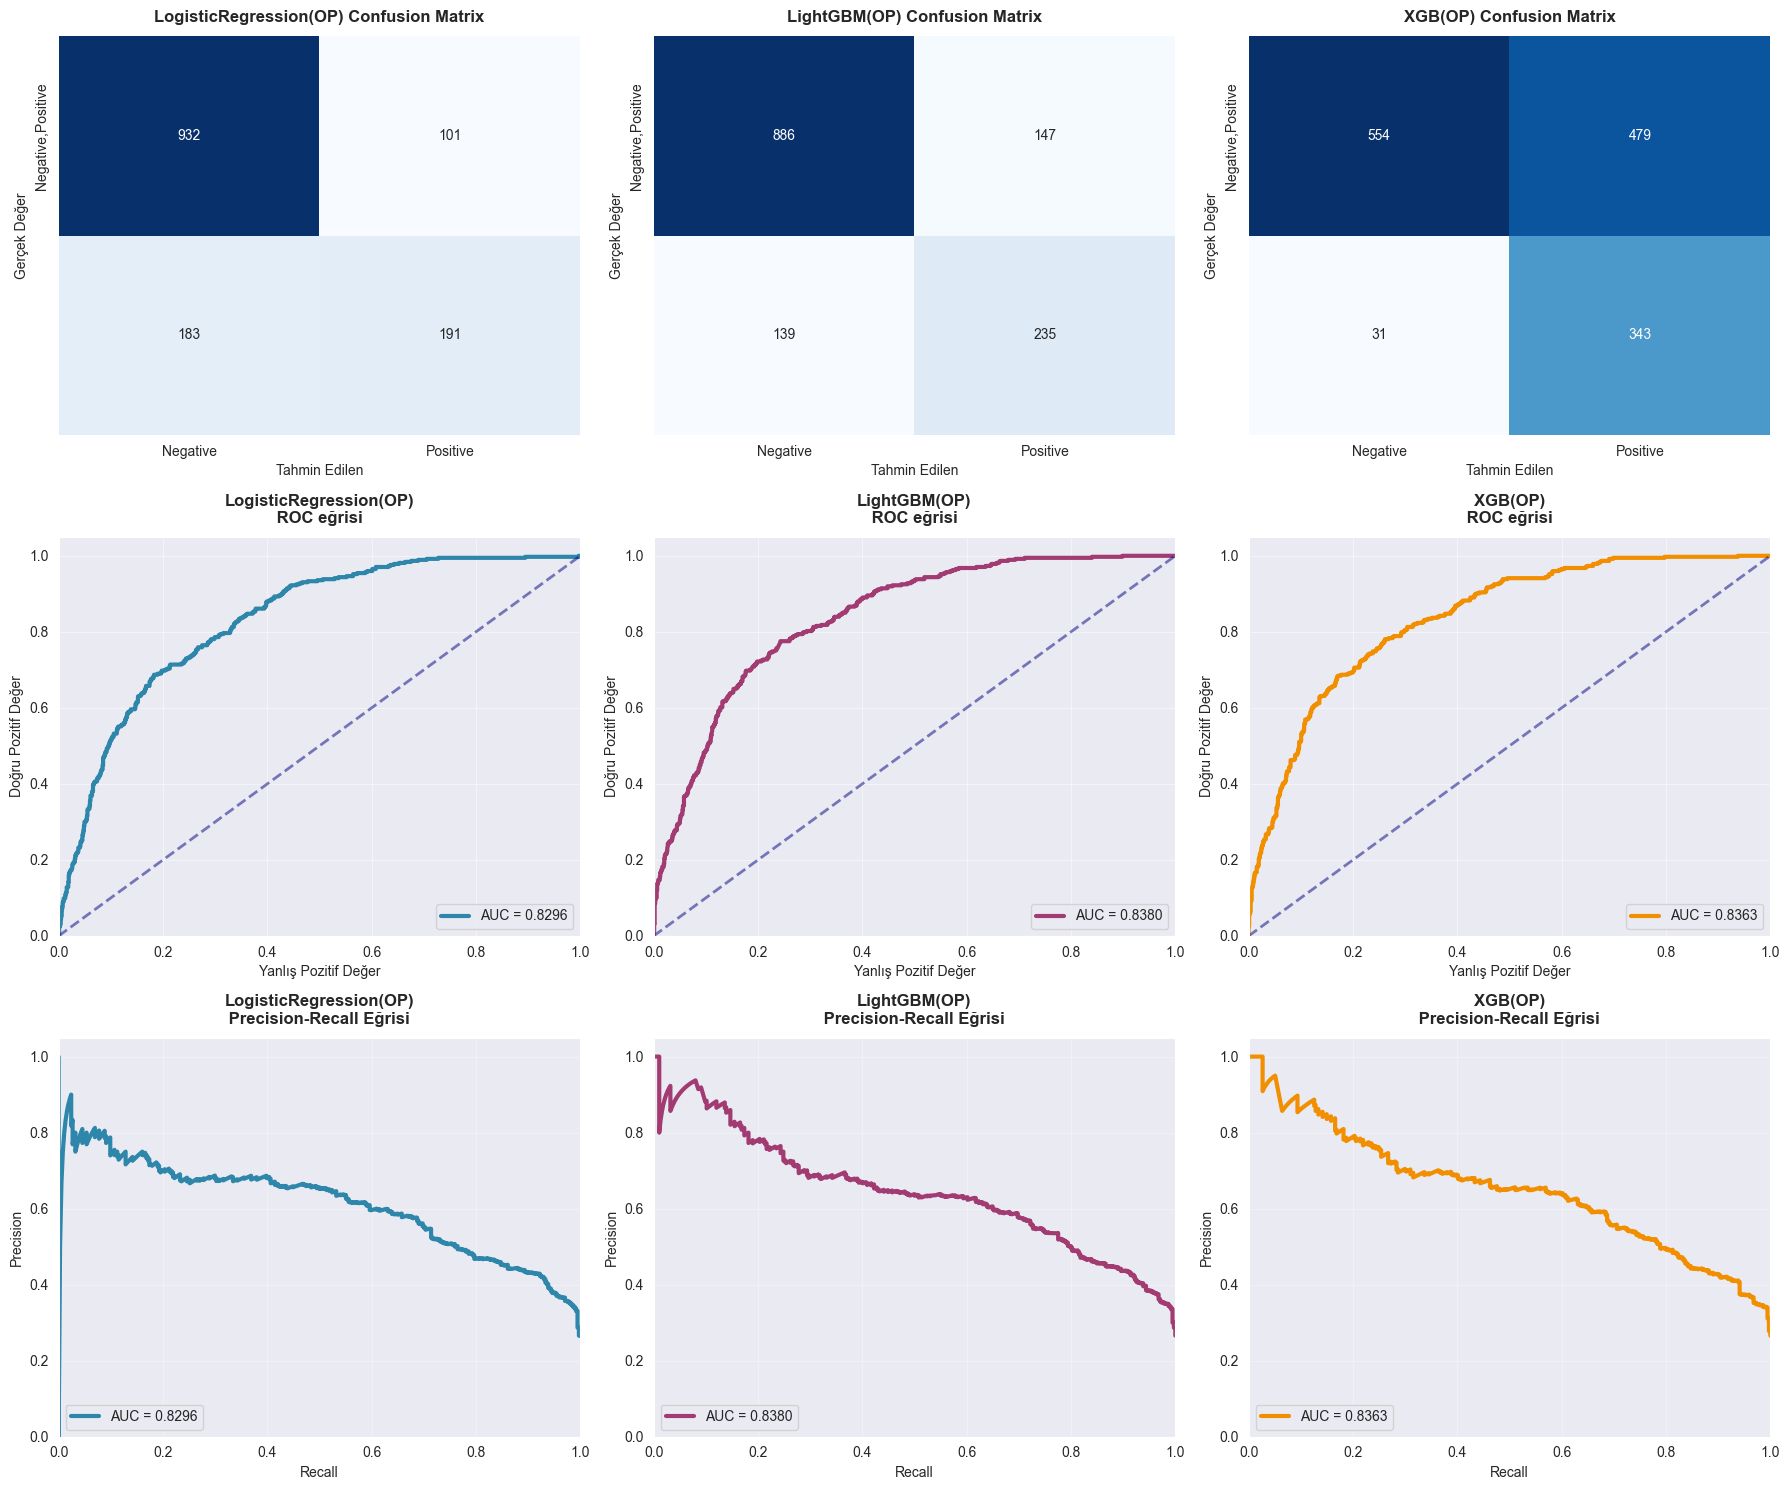

In [83]:
# Hiperparametre optimizasyonu SONRASI grafikler için:
plot_all_metrics(optimized_models,X_test,y_test)

## Modellerin Analizi
- Düzenlediğimiz veri grubunu dört farklı model için karşılaştırmıştık,ve bunlardan 3'ü ile devam etme kararı almıştık.
### 📌Neden RandomForest
- 4 farklı model için karşılaştırma yaptırdığımızda en iyi roc_auc değerini veren modelimiz lojistik regresyon olmuştu.Diğer 3 modelimizi incelediğimizde ise en düşük F1_Score ve Recall değerlerine sahip olan RandomForest modelimizdi.Daha detaylı incelersek (Recall: 0.4823 (±0.0315)) modelimizin pozitif sıfırın neredeyse yarısını tespit edemediğini görüyoruz,bu da büyük bir krize yol açıyor.RandomForest modelinin bagging algoritması ile tahminleri yapması  ve lightGBM ve XGBoost modellerinin hiperparametre aramasında RandomForest modeline göre daha büyük sıçrama yapma ihtimalinin yüksek olması nedeni ile RandomForest modelini hiperparametre araması aşamsına dahil etmedik.(LightGMB ve XGBoost gradient boosting algoritması kullanır daha çok iyileştirme potansiyeli)

### 📉Perfomans Analizleri
- Genel olarak her modelimiz ana metriğimiz ROC AUC değerleri açısından güzel souçlar verdiğini söyleyebiliriz.ROC AUC  sınıflar dengesiz olsa bile genel ayrıştırma gücünü ölcer , 0.84+ bu da bize güçlü bir ayrıştıma yeteneğini gösterir.Optimizasyon öncesi verileri incelediğimizde en istikrarlı modelimizin lojistik regresyon olduğunu söyleyebiliriz.Model stabilitesini baz aldığımızda ise en stabil modelimiz lojistik regresyon oluyor.LightGBM de makul ölçülerde stabilize sağlıyor.Random Forest tarafından bir inceleme yaptığımızda ise yüksek precision, dengesiz bir recall değeri sunuyor.XGBoost modelinin de ortalama bir denge tutumu sergilediğini söyleyebiliriz.
- RandomForest modelmizi düşük -0.4823- recall değeri(pozitif vakaların yarısından fazlasını kaçırıyor) sebebi ile optimizasyon aşamsına dahil etmemiştik.Optimizasyon aşamsında ise her bir model için en uygun hiperparametre arama yöntemini belirledik ve optimizasyon işlemini gerçekleştirdik.Optimizasyonlardan sonra çıkan değerlerden şu sonuçları çıkarabiliriz;

- 📌Genel ayrıştıma gücü sıralaması 1-LightGBM 2-XGBoost 3-LojistikRegresyon
- 📌Recall /Precision analizi: Lojistik regresyon recall değerinde zayıf tutum , precision değerinde görece dengeli tutum sergilese de ;model genel olarak churn tahminlerinde temkinli ve pozitif sınıfı yetrince yakalayamıyor.
 LightGBM ise precision değerinin çok yüksek recall değerinin çok düşük olması bize gerçekten ayrılacak olan müşterileri bulma konusunda zayıf olduğunu gösterir.Bu da bizim için hiç uygun olmaz.
 - XGBoost modelinde ise recall değerinin yüksek precision değerinin düşük olması bize gerçekten ayrılacak müşterilerin büyük  çogunluğunu yakaladığını gösterir.Bizim modelimiz için de gerekli olan budur.
- Daha detaylı açıklarsak biz müşterilerimizin daha az bir oranda -imkan varsa hiç - ayrılmasını istiyoruz.Bunun için bize ayrılma potansiyelini taşıyan müşterileri tahmin edebilen bir model gerekiyordu.4 farklı modelimizi test ederken en iyi ROC AUC ve recall değerlerine sahip olan modeli bulmamız gerekiyordu.Yapılan modelleme aşamaları sonucunda ise bu isteğimizi en iyi bir şekilde karşılayan modelimiz XGBoost olduğuna karar veriyoruz.
- Recall değerini baz almamızın stratejik sebebi ayrılma ihtimali yüksek müşterileri yakalayamamız bize daha büyük zarar verecektir.Diğer yandan ise kalacak kişilerin ayrılacak olarak tahmin edilmesi bize gereksiz kampanya yapmamıza sebep olmasına rağmen müşteri kaybından daha az zarar verecektir.



## Eşik Değer(Threshold) Analizi
- Modellerimiz en iyi tahmin oranlarını verebilmesi için 'eşik değer' bizim için kritik bir öneme sahiptir.Biz modellerimiz için eşik değer ataması yapmadık ,default değeri referans alarak bu modelleri eğitmiş olduk.(Default olarak 0.5 alınır.)
- Her bir model için Recall>0.8 olması ne anlama gelir: Telekominikasyon sekterönde müşteri kaçırmak pahalıdır.(Büyük ekonomik kayıp).Recall > 0.8 ifadesi bize der ki ; elimdeki müşterilerin en az %80 'ini yakalamalıyız.Bu yüzden recall değeri bu sektörde bir veri analisti için oldukça önemlidir.
- Bu şartı sağlamamız için eşik değere (threshold) daha yakından bakalım.Her model için bu şartı sağlamak zorunda olduğumuz bir senaryoda en kolay şekilde bulacağımız model XGBoost olabilir.Zaten aşırı pozitifçi bir yaklaşım sergileyen modelimiz için threshold değerimiz 0.4-0.5 aralığı oldukça yüksek bir recall değeri verecektir.Ama burada precision değerinin çok düşmesine sebep olacağından daha dengeli 0.5-0.6 gibi aralığı tercih edilmesi daha isabetli olacaktır.Grafikleri incelediğimizde de bu aralığın 0.45–0.55 arası olacağını gözlemliyoruz.
- Lineer Regresyon için threshold azaldıkça recall hızlı arttğını görüyoruz.Grafiklerimizden yola çıkarsak lineer regresyon için en uygun threshold aralığı 0.32–0.36 arası olacaktır.
- LightGBM modelimizde pozitif sınıfları çok zor tahmin ediyor olması sebebiyle oldukça düşük bir threshold değeri kaarşımıza çıkacaktır.Grafiği incelediğimizde ise bu şartı sağlayan aralığımız 0.15–0.25 civarı oluyor ama bunun veri grubunun dağılımına göre daha da aşağı bir değer olması da dikkate alınmalıdır.

# ✅ 1) Yanlış Sınıflandırılan Örnekleri İnceleme (Error Analysis)
- Bu kısımda bizi aydınlatacak değerler False Negative ve False Pozitive 'dir.En önemlisi FN(false negative) bize kalacak dediği müşterilerin ayrılmasını gösteren değerdir.

In [84]:
def get_error_cases(model,X_test,y_test):
    y_pred=model.predict(X_test)

    errors=X_test.copy()
    errors['y_true']=y_test
    errors['y_pred']=y_pred

    FN=errors[(errors.y_true==1)&(errors.y_pred==0)]
    FP=errors[(errors.y_true==0)&(errors.y_pred==1)]

    return FN,FP

In [85]:
log_reg=optimized_models['LogisticRegression(OP)']
FN_lr, FP_lr=get_error_cases(log_reg,X_test,y_test)
print(FN_lr,FP_lr)
print(FN_lr.head())
print(FP_lr.head())

      MonthlyCharges  TotalCharges  Total_Internet_Addons  Historical_avg  \
3721       -1.467506     -0.990290              -1.406544       -1.505758   
445         1.366242      1.814670               1.195047        1.385119   
4653       -0.452010     -0.318449               0.327850       -0.422394   
2300        1.278155      1.215140               1.195047        1.330171   
6344        0.337450      0.258778              -0.539347        0.355256   
...              ...           ...                    ...             ...   
3516       -0.714610     -0.952811              -0.972945       -0.781307   
4464        0.561823     -0.628560              -0.105748        0.223649   
6746       -0.275836     -0.903640              -0.105748       -0.199592   
950        -0.659763     -0.969796              -0.972945       -0.736304   
5194        0.817774     -0.124327               0.327850        0.867283   

      InternetService_Fiber optic  PaymentMethod_Electronic check  \
3721  

In [108]:
xgboost = optimized_models['XGB(OP)']
FN_xgb, FP_xgb = get_error_cases(xgboost, X_test, y_test)
print(FN_xgb, FP_xgb)
print(FN_xgb.head())
print(FP_xgb.head())

      MonthlyCharges  TotalCharges  Total_Internet_Addons  Historical_avg  \
2244       -0.013237     -0.085833               0.761449       -0.111504   
654        -1.500746     -0.934876              -1.406544       -1.466416   
3694        1.460977      2.149862               1.628646        1.391793   
3672        0.177896      0.631935               0.327850        0.132817   
6996        0.056568      0.196461               0.327850        0.058038   
2424        1.600587      1.844913               1.628646        1.610855   
4259       -1.502408     -0.981003              -1.406544       -1.486984   
5884       -0.162819      0.235307               1.195047       -0.118206   
4402       -0.526801     -0.177556               0.761449       -0.549054   
4171       -1.524015     -0.925479              -1.406544       -1.463609   
4527        0.520272      0.405120              -0.105748        0.572878   
3844        0.703095      0.364774               1.628646        0.797137   

In [87]:
l_gbm=optimized_models['LightGBM(OP)']
FN_lgbm, FP_lgbm=get_error_cases(l_gbm,X_test,y_test)
print(FN_lgbm,FP_lgbm)
print(FN_lgbm.head())
print(FP_lgbm.head())

      MonthlyCharges  TotalCharges  Total_Internet_Addons  Historical_avg  \
3721       -1.467506     -0.990290              -1.406544       -1.505758   
4653       -0.452010     -0.318449               0.327850       -0.422394   
2300        1.278155      1.215140               1.195047        1.330171   
6344        0.337450      0.258778              -0.539347        0.355256   
978         1.294775      1.808890               1.195047        1.264185   
...              ...           ...                    ...             ...   
2894       -0.147860      0.270492               0.327850       -0.147687   
3197        0.156290     -0.346376               0.327850        0.109349   
4464        0.561823     -0.628560              -0.105748        0.223649   
6746       -0.275836     -0.903640              -0.105748       -0.199592   
2954        0.354070     -0.795263              -0.539347        0.128518   

      InternetService_Fiber optic  PaymentMethod_Electronic check  \
3721  

# ✅ 2) High-Risk Segment Analizi (Segmentasyon)

In [102]:
from IPython.display import display as dp

In [103]:
risk_segment_a=df_telekom[(df_telekom['tenure']<6)&
(df_telekom['MonthlyCharges']>df_telekom['MonthlyCharges'].mean())
]
print('Risk Segment Sayısı',len(risk_segment_a))
dp(risk_segment_a.head(10))

Risk Segment Sayısı 604


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
31,4929-XIHVW,0,1,1,0,2,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,0
36,6047-YHPVI,0,0,0,0,5,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,1
47,7760-OYPDY,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.65,144.15,1
65,5122-CYFXA,1,0,0,0,3,1,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.30,244.10,0
80,5919-TMRGD,1,0,0,1,1,1,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,1
91,2424-WVHPL,0,1,0,0,1,1,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,0
115,3071-VBYPO,0,0,1,1,3,1,No,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,No,Electronic check,89.85,248.40,0
122,0404-SWRVG,0,0,0,0,3,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,229.55,1
139,0390-DCFDQ,1,1,1,0,1,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,1


In [107]:
risk_segment_b=df_telekom[(df_telekom['InternetService']=='No')|(df_telekom['PhoneService']=='No')]
print('Risk Segment Sayısı',len(risk_segment_b))
display(risk_segment_b.head(10))

Risk Segment Sayısı 1526


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,0,0,0,0,16,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0
16,8191-XWSZG,1,0,0,0,52,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0
21,1680-VDCWW,0,0,1,0,12,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0
22,1066-JKSGK,0,0,0,0,1,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
33,7310-EGVHZ,0,0,0,0,1,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
42,9867-JCZSP,1,0,1,1,17,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,0
58,3957-SQXML,1,0,1,1,34,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.95,894.30,0
68,3170-NMYVV,1,0,1,1,50,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.15,930.90,0
71,0731-EBJQB,1,0,1,1,52,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.40,1090.65,0
73,8028-PNXHQ,0,0,1,1,62,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.25,1424.60,0


# ✅ 3) Özellik Önemleri
 ### İki tür önem vardır;
- Gain
- Split Count

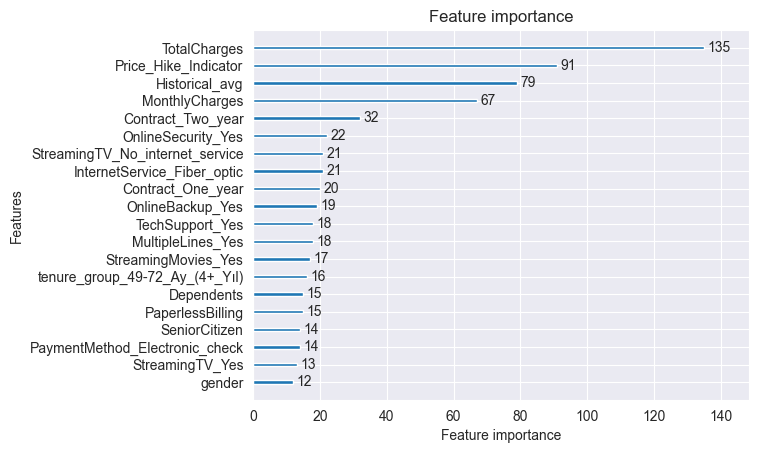

In [90]:
# LightGBM için önem incelemsi
lgb.plot_importance(l_gbm,max_num_features=20)
plt.show()

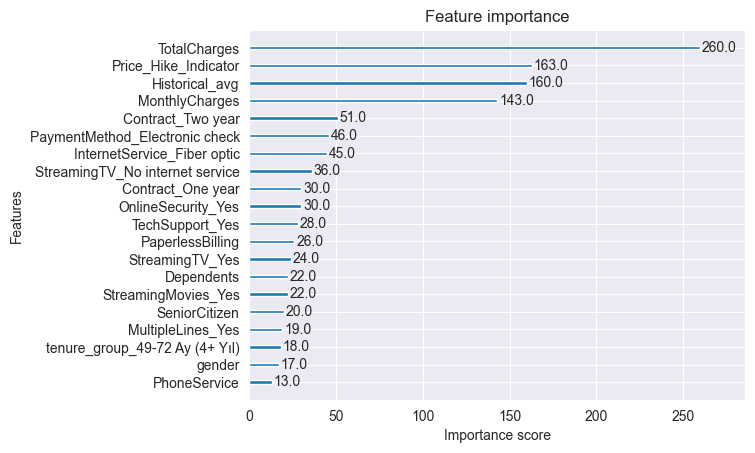

In [109]:
plot_importance(xgboost,max_num_features=20)
plt.show()

# ✅ 3.1) SHAP Analizi

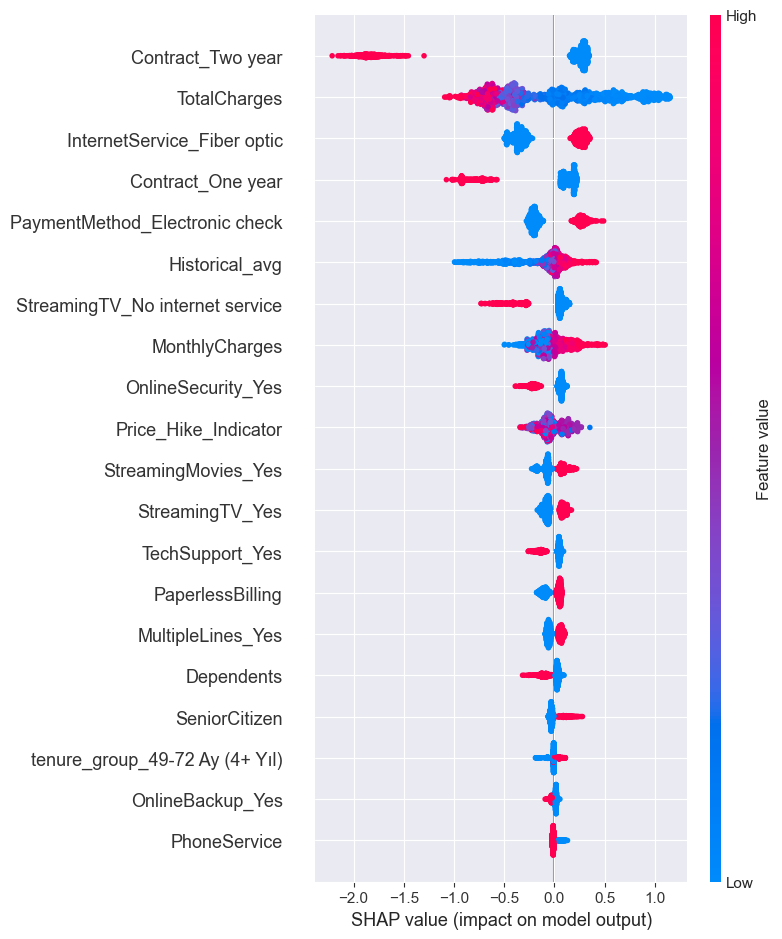

In [93]:
# XGBoost için SHAP analizi
import shap
explainer=shap.TreeExplainer(xgb)
shap_values=explainer.shap_values(X_test)

shap.summary_plot(shap_values,X_test)

C:\Users\mehme\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


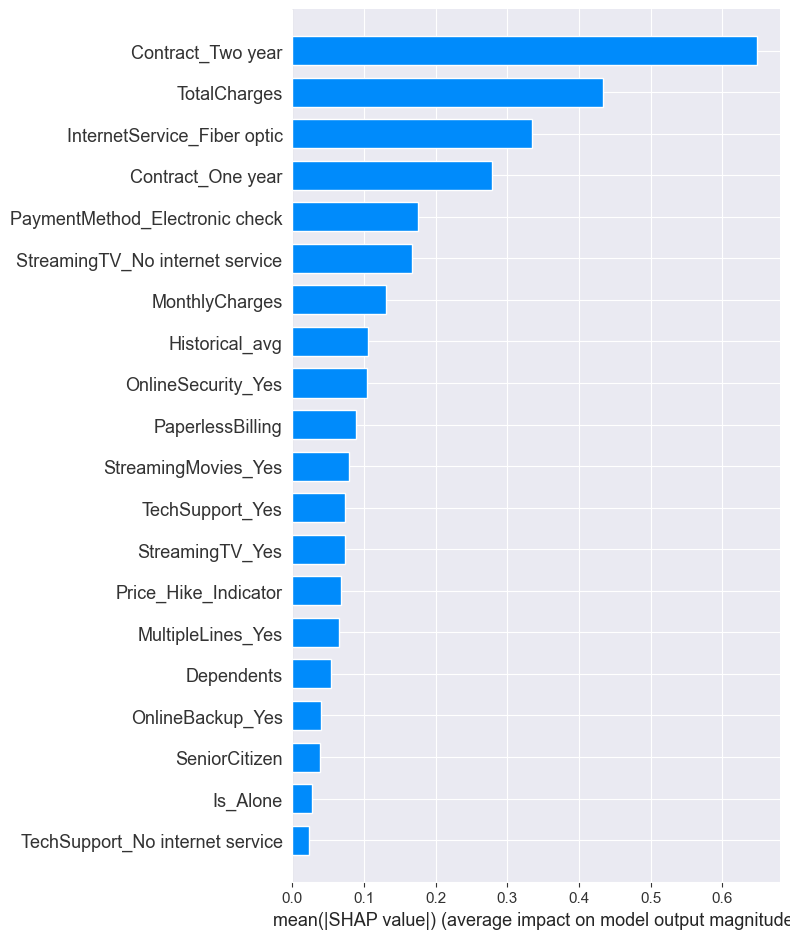

In [97]:
# LightGBM için SHAP analizi
explainer=shap.TreeExplainer(l_gbm)
shap_values=explainer.shap_values(X_test)

shap.summary_plot(shap_values,X_test,plot_type="bar")

In [99]:
print(log_reg.best_estimator_.named_steps)

{'scaler': StandardScaler(), 'model': LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga')}


In [104]:
# Lojistik regresyon için SHAP analizi
best_lr=log_reg.best_estimator_.named_steps['model']
coef_df=pd.DataFrame({
    'feature':X_train.columns,
    'weight':best_lr.coef_[0]
}).sort_values('weight',ascending=False)

dp(coef_df)

,feature,weight
4,InternetService_Fiber optic,0.497810
9,StreamingTV_Yes,0.168906
11,MultipleLines_Yes,0.160252
10,StreamingMovies_Yes,0.152689
6,PaperlessBilling,0.130789
5,PaymentMethod_Electronic check,0.122203
8,SeniorCitizen,0.067228
16,MultipleLines_No phone service,0.047202
17,DeviceProtection_Yes,0.021042
7,Is_Alone,0.011745
